In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

In [2]:
# CLIMATE DAU 
partida_dau = pd.read_csv("dades/dades_csv/climatedau/game_partida.csv", delimiter=',' , encoding="latin-1")
ronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_ronda.csv", delimiter=',' , encoding="latin-1")
user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")

In [3]:
user_dau.drop(user_dau.index[3], inplace=True)
userronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_userronda.csv", delimiter=',' , encoding="latin-1")

eq_user_dau = pd.read_csv("dades/eq_user_dau.csv", delimiter=',' , encoding="latin-1")
ineq_user_dau = user_dau[~user_dau.user_id.isin(eq_user_dau['user_id'])]

# CLIMATE STREET 
partida_street = pd.read_csv("dades/dades_csv/climatestreet/game_partida_street.csv", delimiter=',' , encoding="latin-1")
ronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_ronda_street.csv", delimiter=',' , encoding="latin-1")
user_street = pd.read_csv("dades/dades_csv/climatestreet/game_user_street.csv", delimiter=',' , encoding="latin-1")
user_street.drop(user_street[user_street['diners_inicials']== 0].index, inplace=True)
userronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_userronda_street.csv", delimiter=',' , encoding="latin-1")

# CLIMATE VIL
partida_vil = pd.read_csv("dades/dadesvil/partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil = pd.read_csv("dades/dadesvil/ronda.csv", delimiter=',' , encoding="latin-1")
user_vil = pd.read_csv("dades/dadesvil/user.csv", delimiter=',' , encoding="latin-1")
user_vil.drop(user_vil[user_vil['diners_inicials']== 0].index, inplace=True)
userronda_vil = pd.read_csv("dades/dadesvil/userronda.csv", delimiter=',' , encoding="latin-1")

user_street.rename(columns={'id': 'user_id'}, inplace=True)
user_vil.rename(columns={'id': 'user_id'}, inplace=True)

In [4]:
user_street.tail()

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
117,118,Teo,8850,h,25,r6,NaN,r1,r2,r2,...,False,False,19,0,4,r1,r1,4,10,0
118,119,Eva Ruiz,8015,d,37,r6,NaN,NaN,NaN,NaN,...,False,False,19,0,5,NaN,NaN,16,10,1
119,120,Lobo,8003,h,44,r5,NaN,r1,r2,r2,...,False,False,19,0,3,r3,r3,0,10,0
120,121,Ale,8028,d,28,r6,NaN,r1,r3,r1,...,False,True,19,0,6,r2,r3,14,10,0
121,122,Ruth,8320,h,28,r5,NaN,r1,r2,r2,...,True,False,19,0,2,r2,r3,26,10,0


In [5]:
def contribution_round(user, userronda, norm):
    tonorm = user[['user_id','diners_inicials']]
    tocontr = pd.merge(userronda,tonorm, on = 'user_id')
    #Normalization
    tocontr['selnorm'] = (tocontr['seleccio']/tocontr['diners_inicials'])*10
    rondes = np.arange(1,11)
    ronda_id = np.tile(rondes,len(np.unique(userronda['user_id']))) #324 users
    tocontr['ronda_id'] = ronda_id
    contr_round = pd.pivot(index = tocontr['user_id'], columns = tocontr['ronda_id'], values = tocontr[norm])
    return contr_round

In [6]:
# Normalized contributions per round
## DAU
contr_dau_norm = contribution_round(user_dau,userronda_dau, 'selnorm')
contr_dau = contribution_round(user_dau,userronda_dau, 'seleccio')

## DAU eq: 
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = eq_dau.iloc[:,2:12]
eq_contr_dau = eq_contr_dau.set_index(eq_user_dau.user_id)
eq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

## DAU ineq:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = ineq_dau.iloc[:,2:12]
ineq_contr_dau = ineq_contr_dau.set_index(ineq_user_dau.user_id)
ineq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]

## STREET
contr_street_norm = contribution_round(user_street,userronda_street, 'selnorm')
contr_street = contribution_round(user_street,userronda_street, 'seleccio')

## VIL
contr_vil_norm = contribution_round(user_vil,userronda_vil, 'selnorm')
contr_vil = contribution_round(user_vil,userronda_vil, 'seleccio')

In [7]:
#homogeneous_ds = pd.concat([])

In [8]:
### Ronda 0: 
ronda_dau0 = pd.read_csv("dades/ronda_dau_0.csv", delimiter=',' , encoding="latin-1")
ronda_street0 = pd.read_csv("dades/ronda_street_0.csv", delimiter=',' , encoding="latin-1")
ronda_vil0 = pd.read_csv("dades/ronda_vil_0.csv", delimiter=',' , encoding="latin-1")

In [9]:
daur = pd.read_csv("dades/dau_r.csv", delimiter=',' , encoding="latin-1")
streetr = pd.read_csv("dades/street_r.csv", delimiter=',' , encoding="latin-1")
vilr = pd.read_csv("dades/vil_r.csv", delimiter=',' , encoding="latin-1")

In [10]:
def dataset_2(ds_r,user_ds):
    table1 = ds_r[['user_id','partida_id','mean_contr']]
    table2 = user_ds[['user_id', 'genere', 'rang_edat','prfinal1','prfinal2','prfinal3','prfinal4','prfinal5','prfinal6',
                     'prfinal7','prfinal8','prfinal9','prfinal10','prfinal11','prfinal12','prfinal13','prfinal14','prfinal15']]
    ds_2 = table1.merge(table2, on = 'user_id')
    ds_2['genere'] =ds_2['genere'].map({'d': 1, 'h': 0})
    ds_2['prfinal1'] =ds_2['prfinal1'].map({'r1': 1, 'r2': 2, 'r3':3, 'nan':0})
    ds_2['prfinal2'] =ds_2['prfinal2'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal3'] =ds_2['prfinal3'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal4'] =ds_2['prfinal4'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal5'] =ds_2['prfinal5'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal6'] =ds_2['prfinal6'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal7'] =ds_2['prfinal7'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal8'] =ds_2['prfinal8'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal9'] =ds_2['prfinal9'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal10'] =ds_2['prfinal10'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal11'] =ds_2['prfinal11'].map({'r1': 1, 'r4': 3, 'r3':2,'nan':0})
    ds_2['prfinal12'] =ds_2['prfinal12'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal13'] =ds_2['prfinal13'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal14'] =ds_2['prfinal14'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal15'] =ds_2['prfinal15'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    return(ds_2)

In [11]:
ds_2_dau = dataset_2(daur,user_dau)
ds_2_street = dataset_2(streetr,user_street)

In [12]:
user_vil.rename(columns={'enquesta_final_pr1': 'prfinal1', 'enquesta_final_pr2': 'prfinal2','enquesta_final_pr3': 'prfinal3',
                        'enquesta_final_pr4': 'prfinal4','enquesta_final_pr5': 'prfinal5','enquesta_final_pr6': 'prfinal6',
                        'enquesta_final_pr7': 'prfinal7','enquesta_final_pr8': 'prfinal8','enquesta_final_pr9': 'prfinal9',
                        'enquesta_final_pr10': 'prfinal10','enquesta_final_pr11': 'prfinal11','enquesta_final_pr12': 'prfinal12',
                        'enquesta_final_pr13': 'prfinal13',}, inplace=True)

In [13]:
table1 = vilr[['user_id','partida_id','mean_contr']]
table2 = user_vil[['user_id', 'genere', 'rang_edat','prfinal1','prfinal2','prfinal3','prfinal4','prfinal5','prfinal6',
                 'prfinal7','prfinal8','prfinal9','prfinal10','prfinal11','prfinal12','prfinal13']]
ds_2_vil = table1.merge(table2, on = 'user_id')
ds_2_vil['genere'] =ds_2_vil['genere'].map({'F': 1, 'M': 0})

In [14]:
#create new df 
final_dau = pd.DataFrame({'ronda_obj':ronda_dau0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_dau0['partida_id'])})

final_street = pd.DataFrame({'ronda_obj':ronda_street0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_street0['partida_id'])})

final_vil = pd.DataFrame({'ronda_obj':ronda_vil0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_vil0['partida_id'])})
#print (df)

### Analysis of the games according their ending:
In this section I use a function to generate line plots with the mean contribution of each game ending at certain round. 

In [15]:
def ending_game(final_ds,contr_ds,user_ds,ending_pos,name_ds):
    final = final_ds[final_ds.ronda_obj==ending_pos]
    mean_contr_ds= contr_ds.mean(axis=0)
    #Plot
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(1, 10, 10)
    list_contr=[]
    for i in final.partida_id.unique():
        game_contr = contr_ds.loc[list(user_ds[user_ds.partida_id==i].user_id),:]
        mean_contr_game = game_contr.describe().loc['mean',:]
        ax.plot(x, mean_contr_game, label=["Game:",i])
        list_contr.append([i,game_contr])

    ax.plot(x, mean_contr_ds,label=name_ds,c = 'black')
    plt.xlabel('rounds')
    plt.ylabel('Mean Contribution')
    ax.axvline(x=ending_pos, c = "black")
    plt.legend()
    return(list_contr)

In [16]:
def game_anal(contr_ds,contr_ds_n,user_ds,game_num,end_ronda):
    print('Users Information:')
    print(user_ds[user_ds.partida_id==game_num])
    print('\n')
    print('Contribution Table:')
    contr_game = contr_ds.loc[user_ds[user_ds.partida_id==game_num]['user_id'],:]
    contr_game_n = contr_ds_n.loc[user_ds[user_ds.partida_id==game_num]['user_id'],:]
    print(contr_game)
    print('\n')
    print('Sum of Normalized Contribution:')
    print(contr_game_n.sum(axis=1))
    print('\n')
    print('Evolution Contributions:')
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(1, 10, 10)
    ax.plot(x, contr_game[contr_game == 0].count(),label="0")
    ax.plot(x, contr_game[contr_game == 2].count(),label="2")
    ax.plot(x, contr_game[contr_game == 4].count(),label="4")

    plt.xlabel('Round')
    plt.ylabel('Users')
    ax.axvline(x=end_ronda, c = "black")
    plt.legend()

In [17]:
def without_end (contr_end_round, end_round, n_partida_id):
    f_end = contr_end_round[n_partida_id][1].iloc[:,::-1].iloc[:,(10-end_round):]
    #f_end=f_end[f_end.columns[::-1]]
    
    f_end.columns = list(range(1,end_round+1))
    x = np.linspace(1, end_round, end_round)
    fig = plt.figure()
    ax = plt.axes()
    for i in f_end.index:
        
        #color = 'r' if (group['label'] < 0).all() else 'g'
        ax.plot(x, np.cumsum(f_end[f_end.index == i].values), label=["User:",i])
        plt.xlabel('Final Round - Round')
        plt.ylabel('Accum rev contribution')
        plt.legend()
    return(f_end)

In [18]:
def final_table(final_ds, contr_ds, user_ds, name_ds):
    list1=[]
    for j in [7,8,9,10]:
        end= ending_game(final_ds, contr_ds, user_ds, j,name_ds)
        for i in range(len(end)):
            contr_g = end[i][1].iloc[:,(10-j):]
            list1.append(contr_g)
    frames = [i for i in list1]
    table = pd.concat(frames)
    return(table)

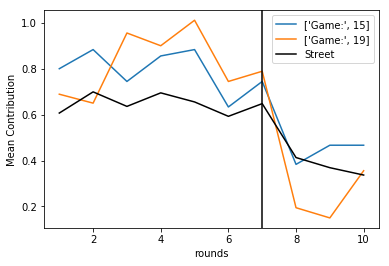

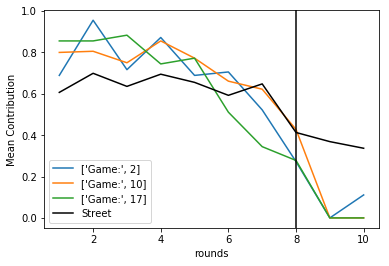

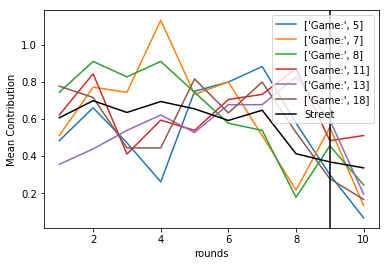

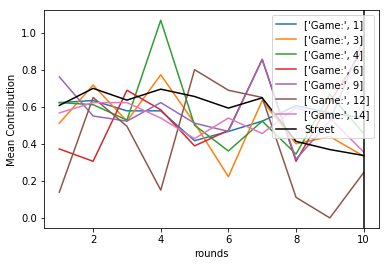

In [19]:
table_street = final_table(final_street,contr_street_norm, user_street, 'Street')

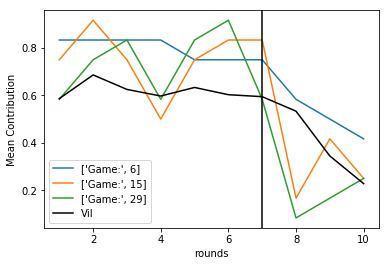

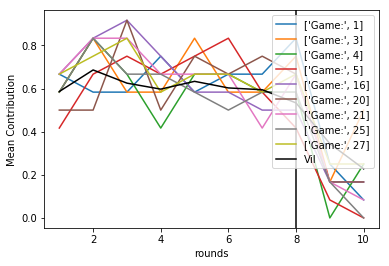

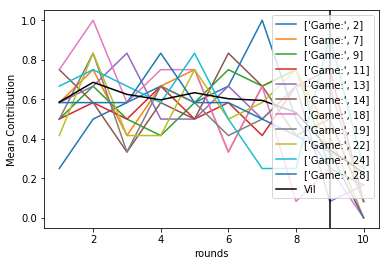

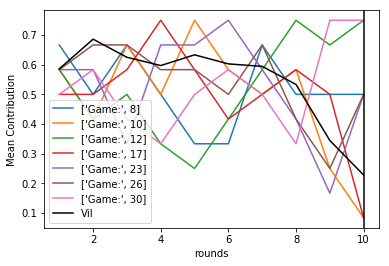

In [20]:
table_vil = final_table(final_vil,contr_vil_norm, user_vil, 'Vil')

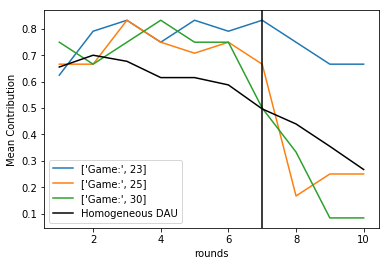

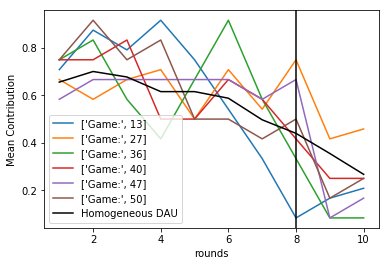

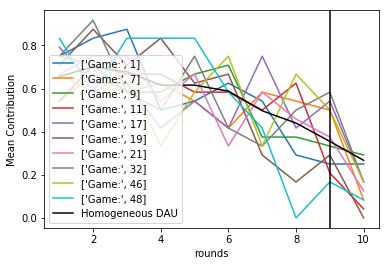

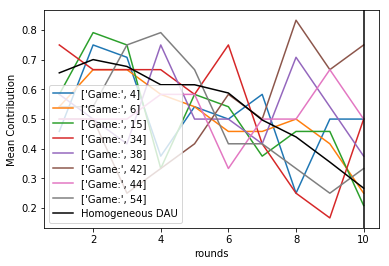

In [21]:
table_eq_dau = final_table(final_dau[final_dau.index.isin(eq_user_dau.partida_id)],eq_contr_dau_norm, eq_user_dau, 'Homogeneous DAU')

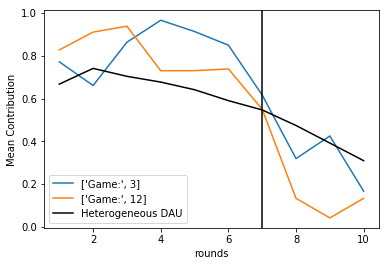

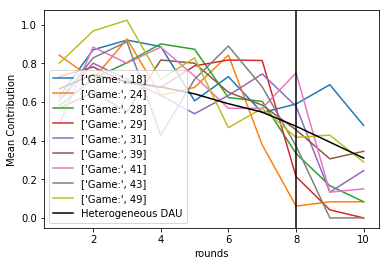

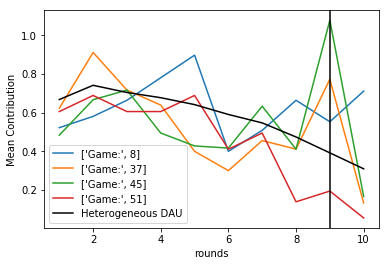

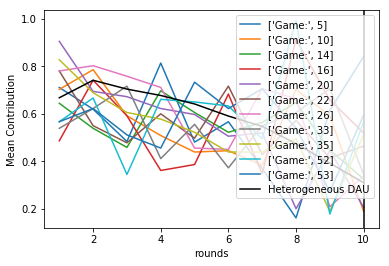

In [22]:
table_ineq_dau = final_table(final_dau[final_dau.index.isin(ineq_user_dau.partida_id)],ineq_contr_dau_norm, ineq_user_dau, 'Heterogeneous DAU')

### Line plots with the reverse accumulated contribution: 

In [22]:
def accum_rev(final_ds,contr_ds,user_ds,name_ds):
    for j in [7,8,9,10]:
        end = ending_game(final_ds, contr_ds, user_ds, j,"Street")
        for i in range(len(end)):
            without_end(end, j,i)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


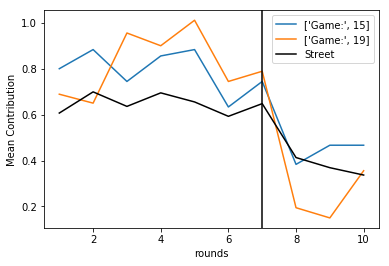

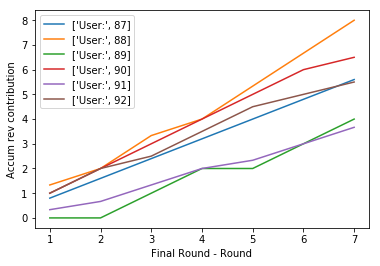

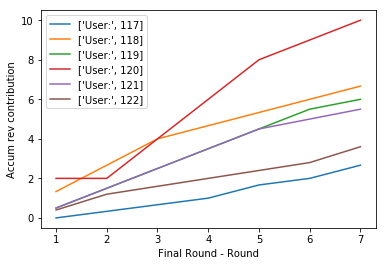

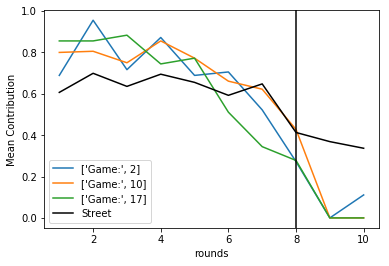

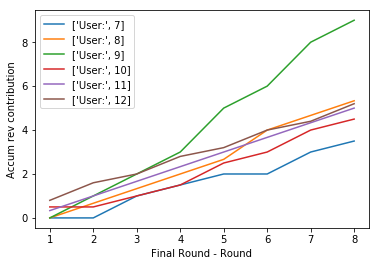

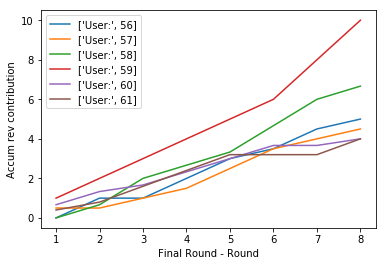

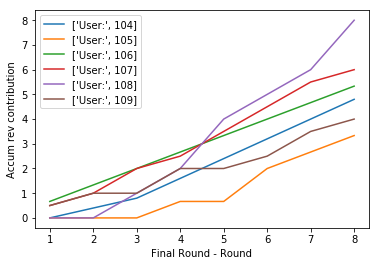

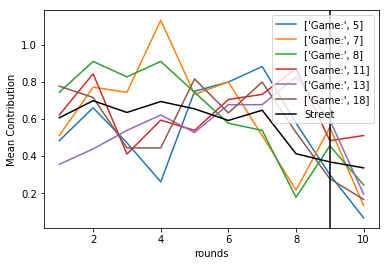

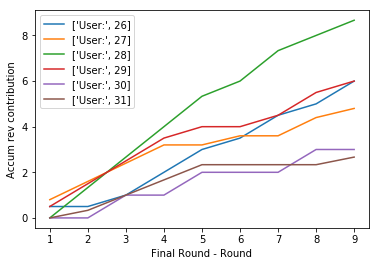

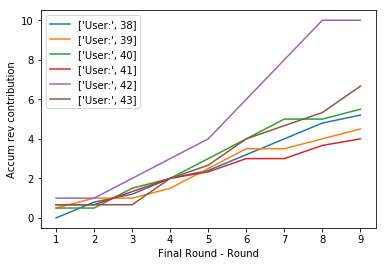

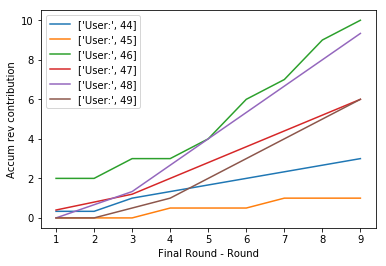

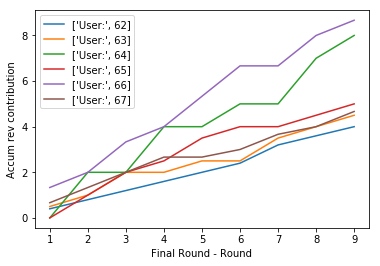

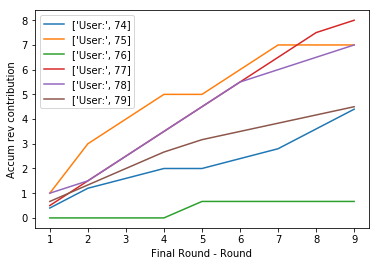

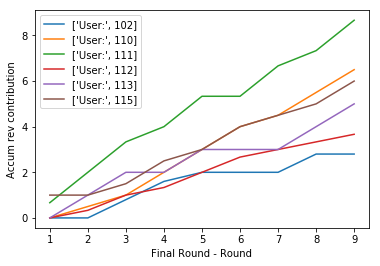

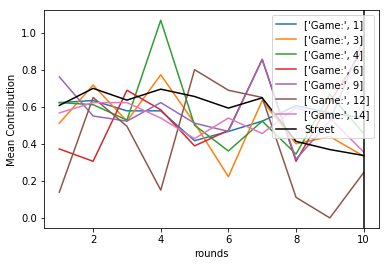

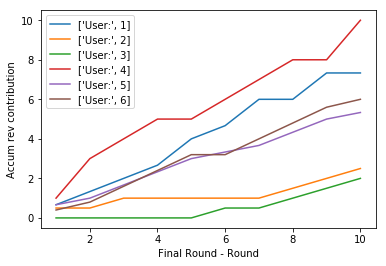

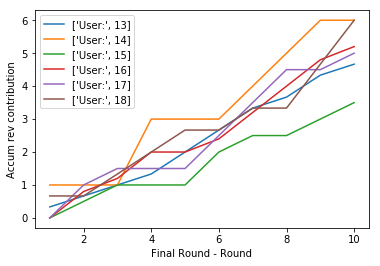

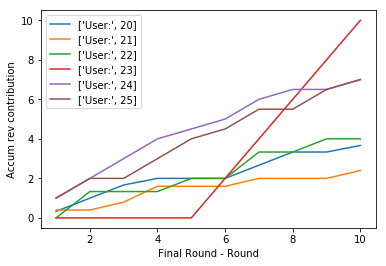

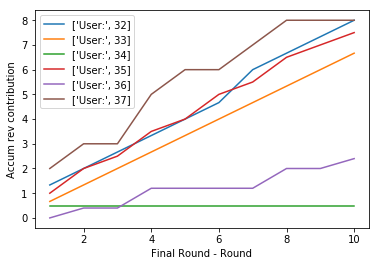

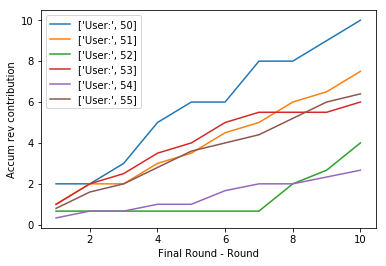

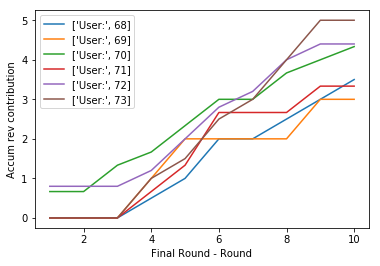

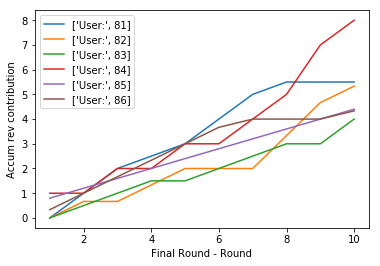

In [24]:
accum_rev(final_street,contr_street_norm,user_street,'Street')

In [33]:
contr_street[contr_street.index == 3]

ronda_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
3,2,2,2,0,2,0,0,0,0,0


In [41]:
user_street[user_street.user_id == 3]['diners_inicials']

2    40
Name: diners_inicials, dtype: int64

In [27]:
user_street[user_street.user_id == 34]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
33,34,Mekii,8820,d,17,r5,NaN,r1,r2,r4,...,True,True,6,0,3,r4,r2,38,10,0


In [28]:
## Took from: https://stackoverflow.com/questions/35611465/python-scikit-learn-clustering-with-missing-data

import numpy as np
from sklearn.cluster import KMeans

def kmeans_missing(X, n_clusters, max_iter=10):
    """Perform K-Means clustering on data with missing values.

    Args:
      X: An [n_samples, n_features] array of data to cluster.
      n_clusters: Number of clusters to form.
      max_iter: Maximum number of EM iterations to perform.

    Returns:
      labels: An [n_samples] vector of integer labels.
      centroids: An [n_clusters, n_features] array of cluster centroids.
      X_hat: Copy of X with the missing values filled in.
    """

    # Initialize missing values to their column means
    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in range(max_iter):
        if i > 0:
            # initialize KMeans with the previous set of centroids. this is much
            # faster and makes it easier to check convergence (since labels
            # won't be permuted on every iteration), but might be more prone to
            # getting stuck in local minima.
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            # do multiple random initializations in parallel
            cls = KMeans(n_clusters, n_jobs=-1)

        # perform clustering on the filled-in data
        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        # fill in the missing values based on their cluster centroids
        X_hat[missing] = centroids[labels][missing]

        # when the labels have stopped changing then we have converged
        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return labels, centroids, X_hat

#### STREET K-MEANS:

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


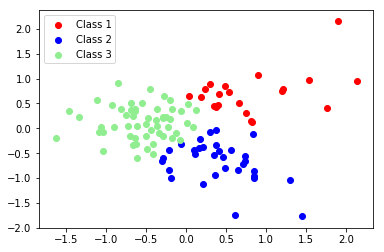

In [37]:
X = table_street
labels, centroids, X_hat = kmeans_missing(X, 3, max_iter=10)

### PCA: 
### Unsupervised clustering (K-MEANS)

X = X_hat
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [39]:
pca.explained_variance_ratio_

array([ 0.26193766,  0.18620034])

#### VIL K-MEANS:

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


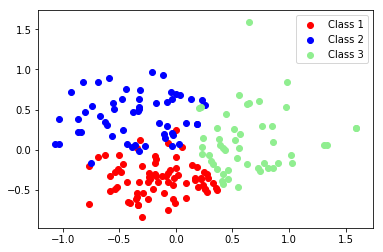

In [40]:
X = table_vil
labels, centroids, X_hat = kmeans_missing(X, 3, max_iter=10)

### PCA: 
### Unsupervised clustering (K-MEANS)

X = X_hat
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [41]:
pca.explained_variance_ratio_

array([ 0.22278763,  0.16493078])

#### HOMOGENEOUS DAU K-MEANS:

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


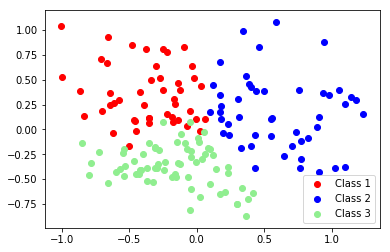

In [42]:

X = table_eq_dau
labels, centroids, X_hat = kmeans_missing(X, 3, max_iter=10)

### PCA: 
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
#X = ds_2_dau.iloc[:,-15:].fillna(0)

X = X_hat
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [43]:
pca.explained_variance_ratio_

array([ 0.25957866,  0.18943387])

#### HETEROGENEOUS DAU K-MEANS:

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


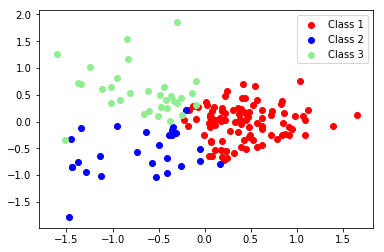

In [44]:
X = table_ineq_dau
labels, centroids, X_hat = kmeans_missing(X, 3, max_iter=10)

### PCA: 
### Unsupervised clustering (K-MEANS)
X = X_hat
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [45]:
pca.explained_variance_ratio_

array([ 0.29213199,  0.16635065])

In [24]:
import time
import hashlib
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

In [35]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal
    

In [33]:
X = table_street
labels, centroids, X_hat = kmeans_missing(X, 3, max_iter=10)
k, gapdf = optimalK(X_hat, nrefs=5, maxClusters=15)
print ('Optimal k is: ', k)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Optimal k is:  14


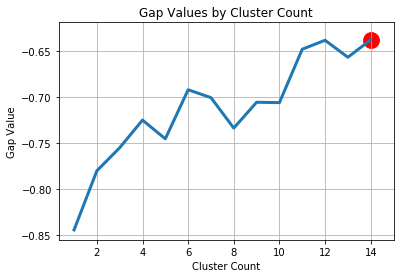

In [34]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

In [58]:
from sklearn.datasets.samples_generator import make_blobs
from gap_statistic import OptimalK
X = table_street
labels, centroids, X_hat = kmeans_missing(X, 5, max_iter=10)
optimalK = OptimalK(parallel_backend='pandas')
optimalK(X_hat, cluster_array=[1,2,3,4,5])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


3

In [59]:
X_hat.shape

(108, 10)

In [61]:
X_hat[0,:]

array([ 0.5406019 ,  0.61516718,  0.57703111,  0.8       ,  0.8       ,
        0.8       ,  0.8       ,  0.8       ,  0.8       ,  0.8       ])

### Elbow method to find the optimal number of clusters: 

In [43]:
def elbow(X):
    labels, centroids, X_hat = kmeans_missing(X, 3, max_iter=10)
    k, gapdf = optimalK(X_hat, nrefs=5, maxClusters=15)
    print ('Optimal k is: ', k)

    cluster_range = range( 1, 20)
    cluster_errors = []

    for num_clusters in cluster_range:
        clusters = KMeans( num_clusters )
        clusters.fit( X_hat )
        cluster_errors.append( clusters.inertia_ )

    clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

    clusters_df[0:10]

    plt.figure(figsize=(12,6))
    plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Optimal k is:  14


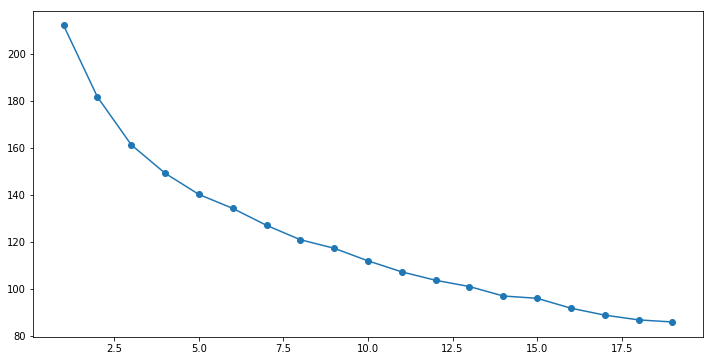

In [44]:
elbow(table_vil)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Optimal k is:  14


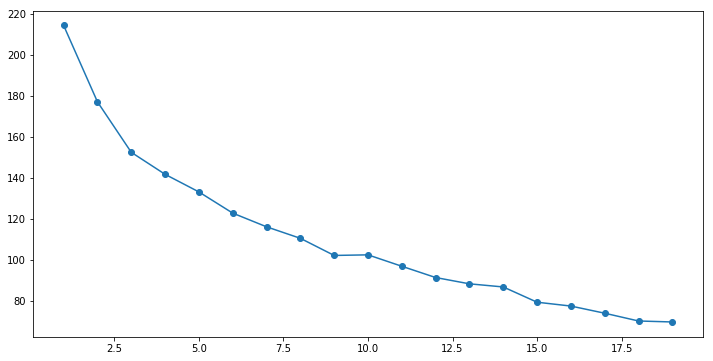

In [45]:
elbow(table_street)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Optimal k is:  11


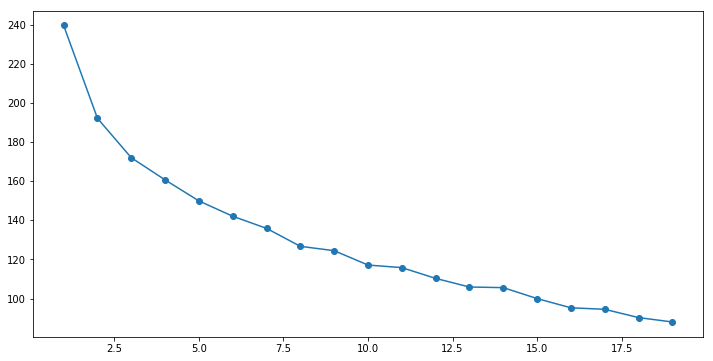

In [46]:
elbow(table_ineq_dau)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Optimal k is:  13


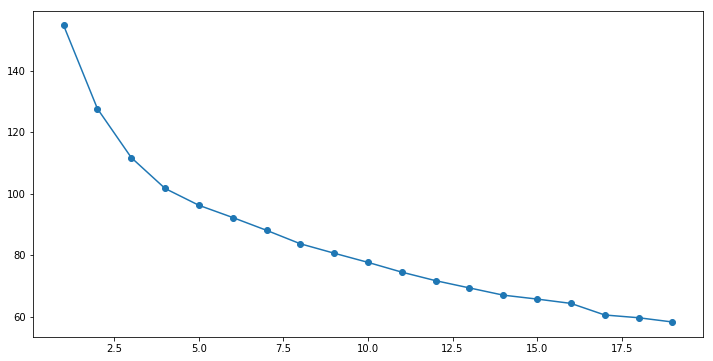

In [47]:
elbow(table_eq_dau)

#### Histogram with the count of the ending games

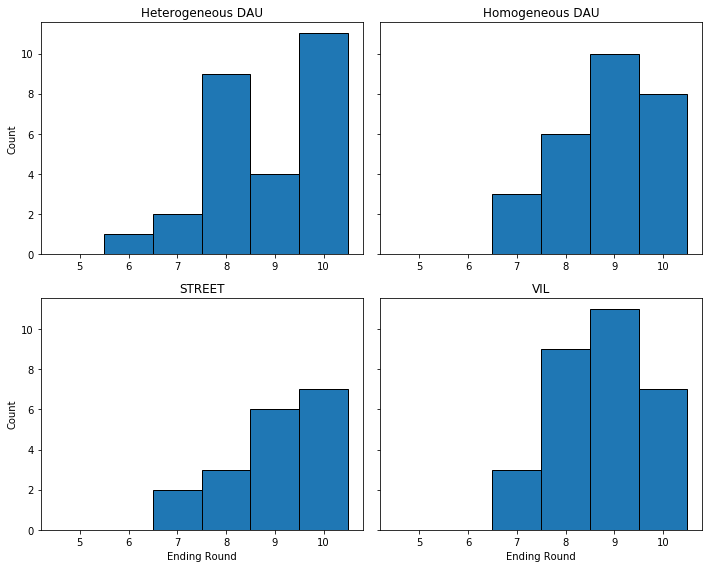

In [34]:
#Plot of Anscombe's quartet

bins=np.arange(5,12,1)
fig, axs = plt.subplots(2, 2, figsize=(10, 8),sharex=False, sharey=True)

axs[0,0].hist(final_dau.loc[final_dau.index.isin(ineq_user_dau.partida_id),'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
axs[0,0].set_xticks(bins[:-1])
#axs[0,0].set_xlabel('Ending Round')
axs[0,0].set_ylabel('Count')
axs[0,0].set_title('Heterogeneous DAU')

axs[0,1].hist(final_dau.loc[final_dau.index.isin(eq_user_dau.partida_id),'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
axs[0,1].set_xticks(bins[:-1])
#axs[0,1].set_xlabel('Ending Round')
#axs[0,1].set_ylabel('Count')
axs[0,1].set_title('Homogeneous DAU')

axs[1,0].hist(final_street.loc[:,'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
axs[1,0].set_xticks(bins[:-1])
axs[1,0].set_xlabel('Ending Round')
axs[1,0].set_ylabel('Count')
axs[1,0].set_title('STREET')

axs[1,1].hist(final_vil.loc[:,'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
axs[1,1].set_xticks(bins[:-1])
axs[1,1].set_xlabel('Ending Round')
#axs[1,1].set_ylabel('Count')
axs[1,1].set_title('VIL')

fig.tight_layout()    
    
    
plt.show()

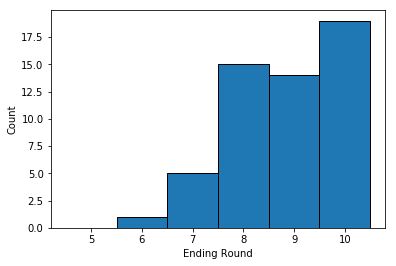

Mean ending round:
8.833333333333334


In [35]:
bins=np.arange(5,12,1)
fig, ax = plt.subplots(1,1)
ax.hist(final_dau.loc[:,'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
ax.set_xticks(bins[:-1])
ax.set_xlabel('Ending Round')
ax.set_ylabel('Count')
plt.show()
print('Mean ending round:')
print(np.mean(final_dau.loc[:,'ronda_obj']))

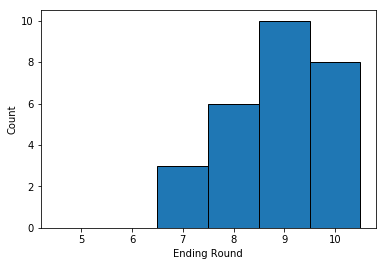

Mean ending round:
8.851851851851851


In [36]:
bins=np.arange(5,12,1)
fig, ax = plt.subplots(1,1)
ax.hist(final_dau.loc[final_dau.index.isin(eq_user_dau.partida_id),'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
ax.set_xticks(bins[:-1])
ax.set_xlabel('Ending Round')
ax.set_ylabel('Count')
plt.show()
print('Mean ending round:')
print(np.mean(final_dau.loc[final_dau.index.isin(eq_user_dau.partida_id),'ronda_obj']))

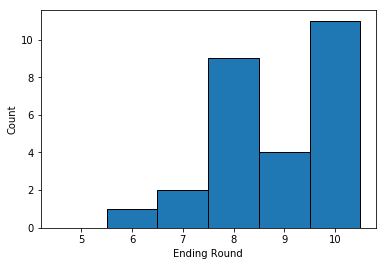

Mean ending round:
8.814814814814815


In [37]:
bins=np.arange(5,12,1)
fig, ax = plt.subplots(1,1)
ax.hist(final_dau.loc[final_dau.index.isin(ineq_user_dau.partida_id),'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
ax.set_xticks(bins[:-1])
ax.set_xlabel('Ending Round')
ax.set_ylabel('Count')
plt.show()
print('Mean ending round:')
print(np.mean(final_dau.loc[final_dau.index.isin(ineq_user_dau.partida_id),'ronda_obj']))

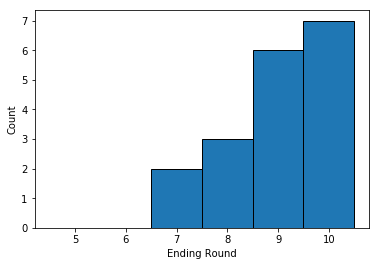

Mean ending round:
9.0


In [38]:
bins=np.arange(5,12,1)
fig, ax = plt.subplots(1,1)
ax.hist(final_street.loc[:,'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
ax.set_xticks(bins[:-1])
ax.set_xlabel('Ending Round')
ax.set_ylabel('Count')
plt.show()
print('Mean ending round:')
print(np.mean(final_street.loc[:,'ronda_obj']))

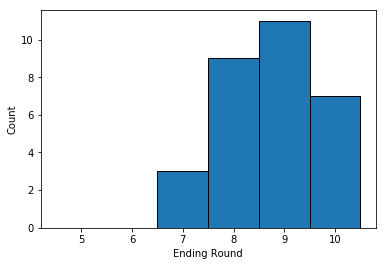

Mean ending round:
8.733333333333333


In [39]:
bins=np.arange(5,12,1)
fig, ax = plt.subplots(1,1)
ax.hist(final_vil.loc[:,'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
ax.set_xticks(bins[:-1])
ax.set_xlabel('Ending Round')
ax.set_ylabel('Count')
plt.show()
print('Mean ending round:')
print(np.mean(final_vil.loc[:,'ronda_obj']))

### What happens to the first three rounds, from three to six, and from six to the end?
### Also can be done by 5 and 5:

Distributions of normalized contributions in the three phases of the game. The mean (SD) in each phase, based on
the accumulated capital in the common fund, is: common fund from 0 to 30 e: 0.67 (0.33), common fund from 31 to 96 e:
0.62 (0.37), and common fund from 97 to 120 e: 0.39 (0.38).

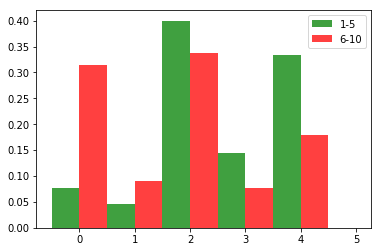

In [126]:
table1 = eq_contr_dau.iloc[:,:5]
table2 = eq_contr_dau.iloc[:,5:]

first = table1.values.flatten()
final = table2.values.flatten()

ax = plt.subplot(111)
ax.hist(first, bins=np.arange(6) - 0.50, normed=1, facecolor='green', alpha=0.75, width=0.5, label='1-5')
ax.hist(final, bins=np.arange(6) , normed=1, facecolor='red', alpha=0.75, width=0.5, label='6-10')
#ax.hist(np.mean(dos), normed=1, facecolor='red', alpha=0.75)
#ax.hist(np.mean(cuatro), normed=1, facecolor='blue', alpha=0.75)
#ax.bar(np.array([0,2,4])+0.2, df.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
plt.legend()
plt.show()

In [45]:
def split_contr(contr_ds,name_ds):
    table1 = contr_ds.loc[:,:5]
    table2 = contr_ds.loc[:,5:]
    d = {'0': [table1[table1 == 0].count().sum(), table2[table2 == 0].count().sum()], 
     '2': [table1[table1 == 2].count().sum(), table2[table2 == 2].count().sum()], 
     '4': [table1[table1 == 4].count().sum(), table2[table2 == 4].count().sum()]}
    df = pd.DataFrame(data=d, index = ['1-5','6-10'])
    ax = plt.subplot(111)
    ax.bar(np.array([0,2,4])-0.2, df.loc['1-5',:].values,align='center',width = 0.4, label='1-5')
    ax.bar(np.array([0,2,4])+0.2, df.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
    ax.set_xlabel('Investment Selection')
    ax.set_ylabel('Count')
    ax.set_title(name_ds)
    plt.legend()
    plt.show()
    return(table1,table2,df)

In [46]:
def split_contr_dau(contr_ds,name_ds):
    table1 = contr_ds.iloc[:,:5]
    table2 = contr_ds.iloc[:,5:]
    d = {'0': [table1[table1 == 0].count().sum(), table2[table2 == 0].count().sum()], 
     '1': [table1[table1 == 1].count().sum(), table2[table2 == 1].count().sum()], 
     '2': [table1[table1 == 2].count().sum(), table2[table2 == 2].count().sum()], 
     '3': [table1[table1 == 3].count().sum(), table2[table2 == 3].count().sum()],
     '4': [table1[table1 == 4].count().sum(), table2[table2 == 4].count().sum()]}
    df = pd.DataFrame(data=d, index = ['1-5','6-10'])
    ax = plt.subplot(111)
    ax.bar(np.array([0,1,2,3,4])-0.2, df.loc['1-5',:].values,align='center',width = 0.4, label='1-5')
    ax.bar(np.array([0,1,2,3,4])+0.2, df.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
    ax.set_xlabel('Investment Selection')
    ax.set_ylabel('Count')
    ax.set_title(name_ds)
    
    plt.legend()
    plt.show()
    return(table1,table2,df)

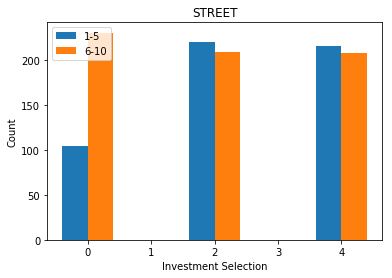

In [47]:
t1_s, t2_s, df_s = split_contr(contr_street, 'STREET')

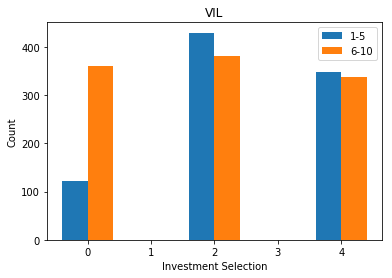

In [48]:
t1_v, t2_v,df_v = split_contr(contr_vil, 'VIL')

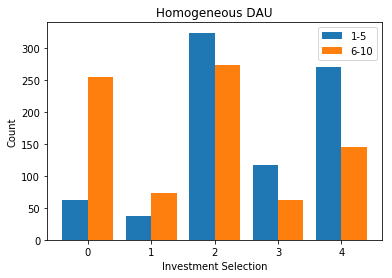

In [49]:
t1_ho, t2_ho, df_ho = split_contr_dau(eq_contr_dau, 'Homogeneous DAU')

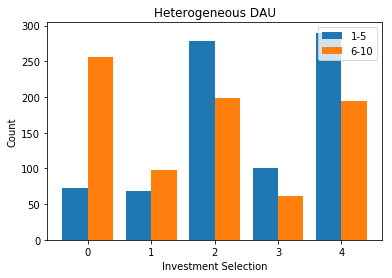

In [50]:
t1_he, t2_he, df_he = split_contr_dau(ineq_contr_dau, 'Heterogeneous DAU')

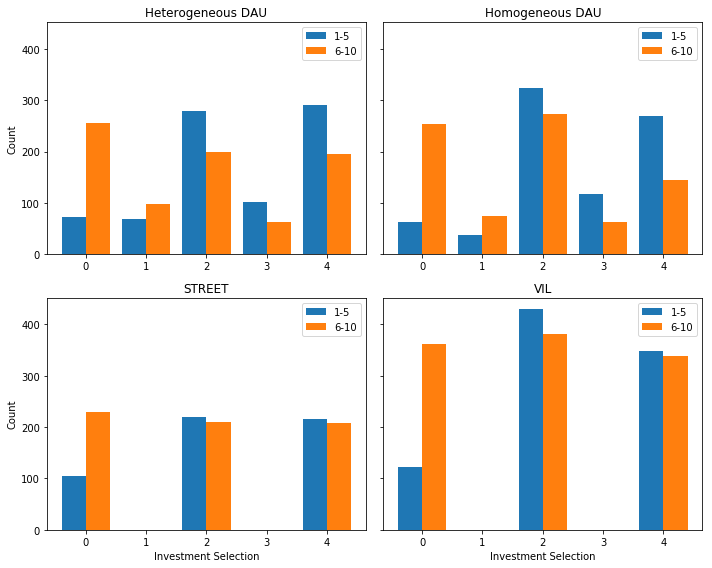

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8),sharex=False, sharey=True)

axs[0,0].bar(np.array([0,1,2,3,4])-0.2, df_he.loc['1-5',:].values,align='center',width = 0.4, label='1-5') 
axs[0,0].bar(np.array([0,1,2,3,4])+0.2, df_he.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
axs[0,0].set_ylabel('Count')
axs[0,0].set_title('Heterogeneous DAU')
axs[0,0].legend()

axs[0,1].bar(np.array([0,1,2,3,4])-0.2, df_ho.loc['1-5',:].values,align='center',width = 0.4, label='1-5')
axs[0,1].bar(np.array([0,1,2,3,4])+0.2, df_ho.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
axs[0,1].set_title('Homogeneous DAU')
axs[0,1].legend()

axs[1,0].bar(np.array([0,2,4])-0.2, df_s.loc['1-5',:].values,align='center',width = 0.4, label='1-5')
axs[1,0].bar(np.array([0,2,4])+0.2, df_s.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
axs[1,0].set_xlabel('Investment Selection')
axs[1,0].set_ylabel('Count')
axs[1,0].set_title('STREET')
axs[1,0].legend()

axs[1,1].bar(np.array([0,2,4])-0.2, df_v.loc['1-5',:].values,align='center',width = 0.4, label='1-5')
axs[1,1].bar(np.array([0,2,4])+0.2, df_v.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
axs[1,1].set_xlabel('Investment Selection')
axs[1,1].set_title('VIL')
axs[1,1].legend()

fig.tight_layout()    
    
plt.show()

### Determine categories:

In [23]:
from matplotlib.ticker import MaxNLocator

In [24]:
def label_saving (row,category):
    if row[category] < 0.400 :
        return 0
    if row[category] >= 0.400 and row[category] <= 0.600 :
        return 1
    else:
        return 2

In [25]:
def label_saving_4 (row,category):
    if row[category] < 0.250 :
        return 0
    if row[category] >= 0.250 and row[category] < 0.500:
        return 1
    if row[category] >= 0.500 and row[category] < 0.750 :
        return 2
    else:
        return 3

In [26]:
def label_saving_5 (row,category):
    if row[category] < 0.200 :
        return 0
    if row[category] >= 0.200 and row[category] < 0.400:
        return 1
    if row[category] >= 0.400 and row[category] <= 0.600 :
        return 2
    if row[category] > 0.600 and row[category] <= 0.800 :
        return 3
    else:
        return 4

In [27]:
def categories (contr_ds,user_ds,category):
    category_ds = user_ds.loc[:,["user_id","diners_inicials",'partida_id']]
    category_ds.set_index('user_id', inplace=True)
    #category_ds= category_ds.reindex(category_ds.loc[:,'user_id'])
    category_ds['contr_total']=contr_ds.sum(axis=1)
    category_ds['contr/budget']= (category_ds.contr_total)/ category_ds.diners_inicials
    category_ds['category']=category_ds.apply (lambda row: label_saving (row,'contr/budget'),axis=1)
    category_ds['category4']=category_ds.apply (lambda row: label_saving_4 (row,'contr/budget'),axis=1)
    category_ds['category5']=category_ds.apply (lambda row: label_saving_5 (row,'contr/budget'),axis=1)
    #category_ds['partida_id'] = user_street.partida_id
    categories_per_group = []

    for i in np.unique(category_ds.partida_id):
        x = category_ds[category_ds.partida_id==i][category].value_counts()
        categories_per_group.append(x)
        fig = plt.figure()
        ax = plt.axes()
        ax.bar(x.keys(),x,align='center',width = 0.4)
        #ax.bar(np.array([0,1,2,3,4])+0.2, df.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
        ax.set_xlabel('User Category')
        ax.set_ylabel('Count')
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set_xlim((-0.5,3.5))
        name = 'Game:',int(i)
        ax.set_title(name)  
    return category_ds

In [103]:
category_ineq_dau[category_ineq_dau.category4 == 3].count()

diners_inicials    35
partida_id         35
contr_total        35
contr/budget       35
category           35
category4          35
category5          35
dtype: int64

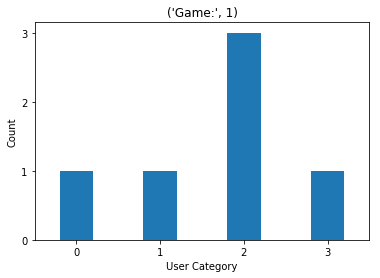

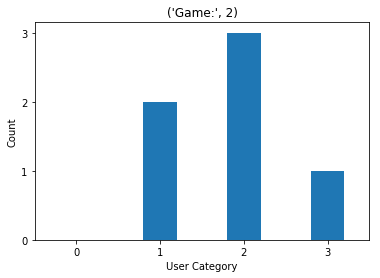

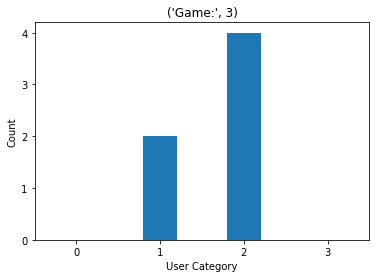

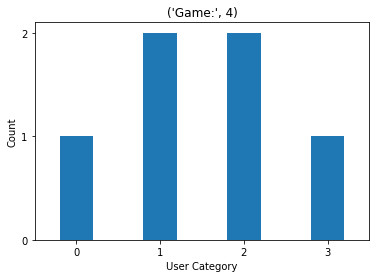

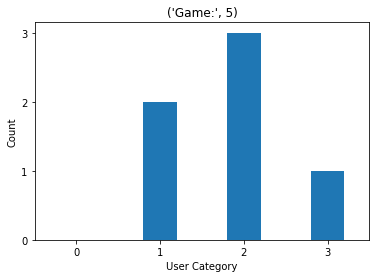

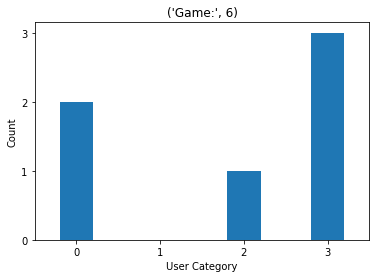

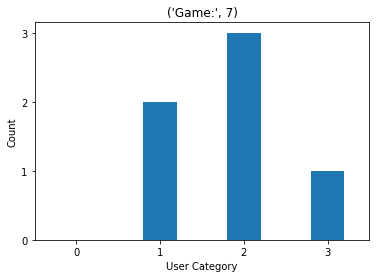

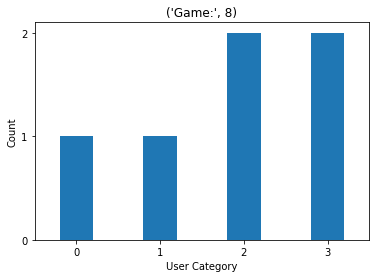

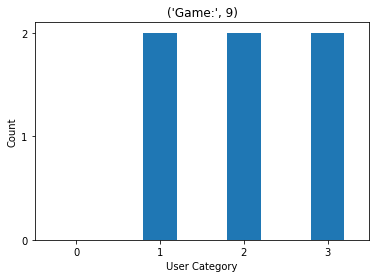

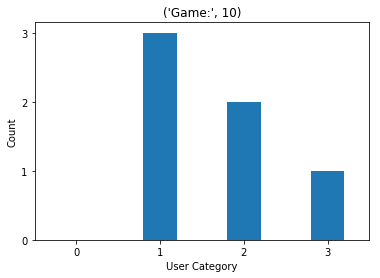

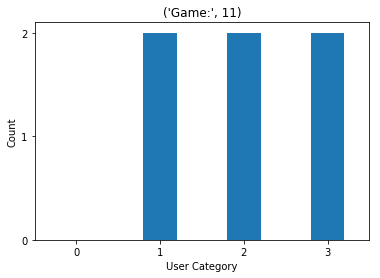

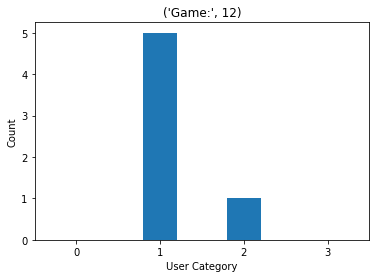

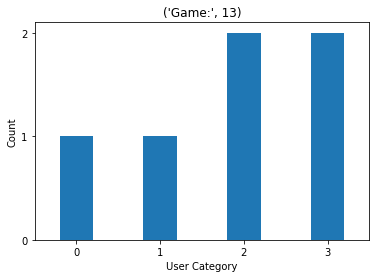

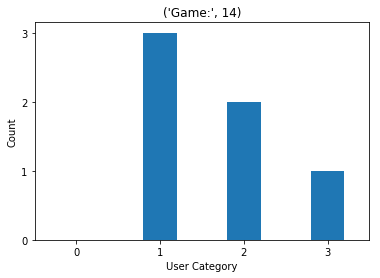

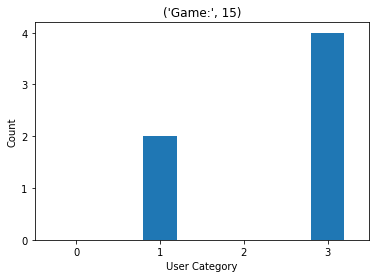

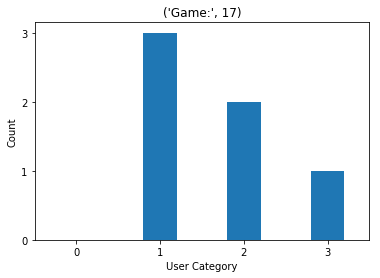

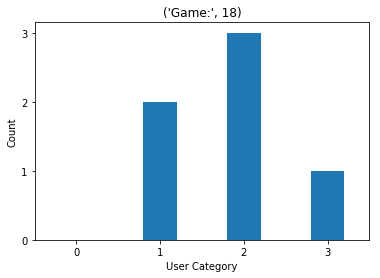

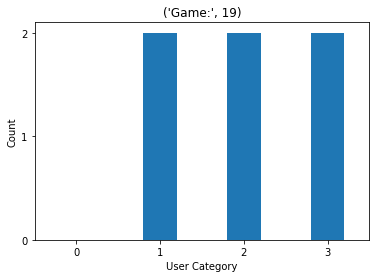

In [28]:
category_street = categories(contr_street,user_street, 'category4')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


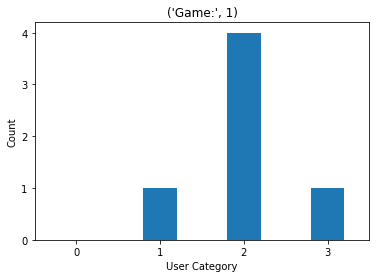

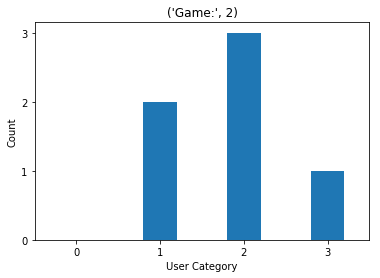

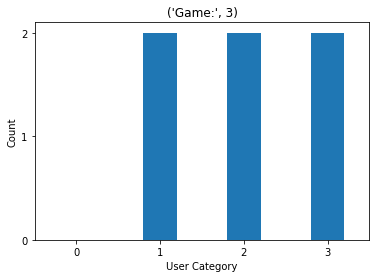

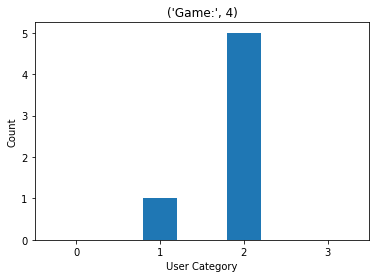

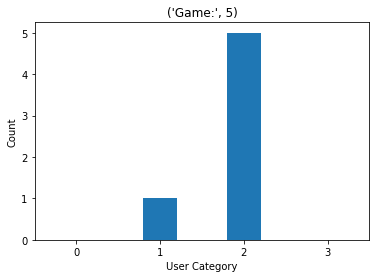

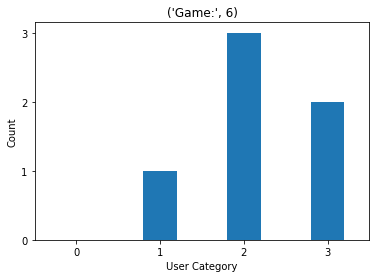

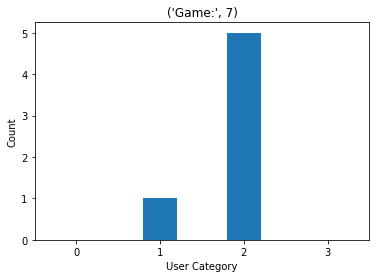

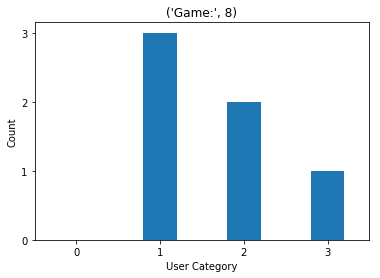

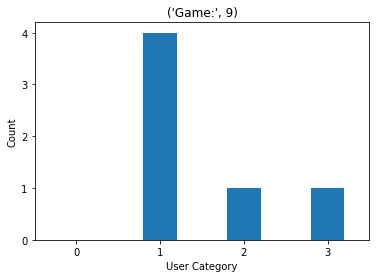

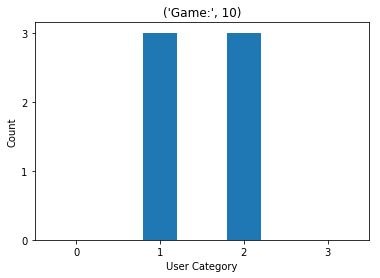

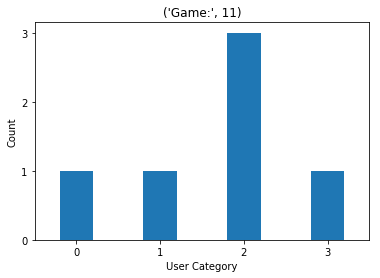

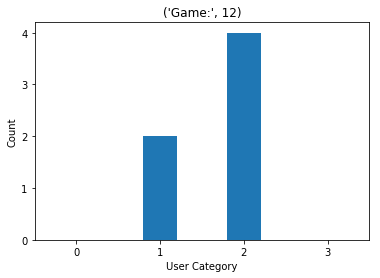

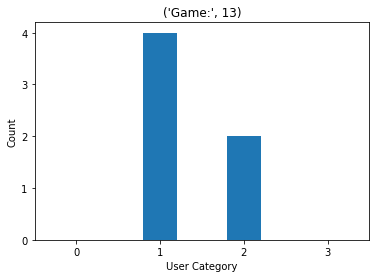

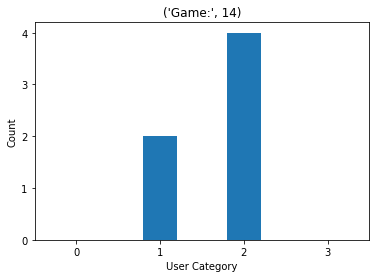

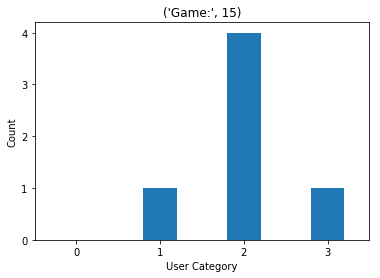

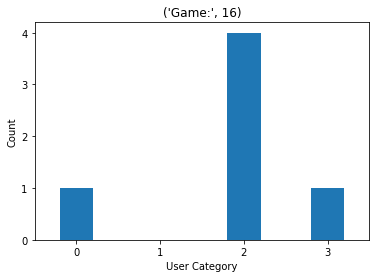

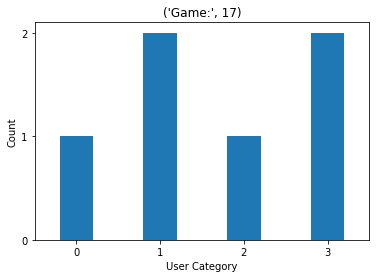

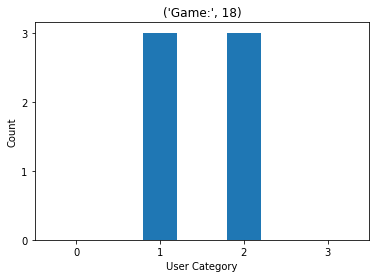

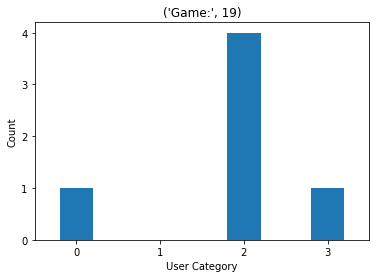

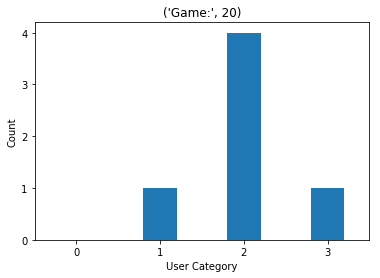

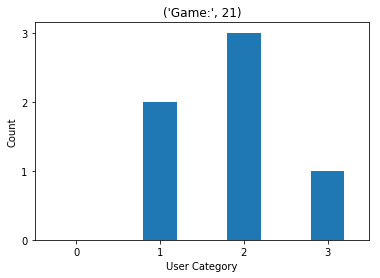

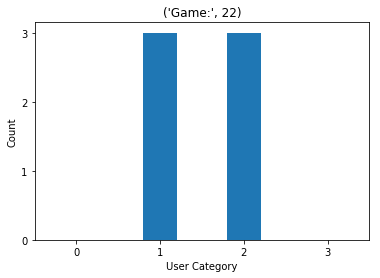

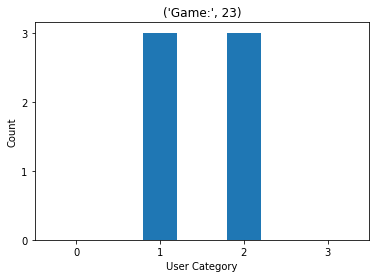

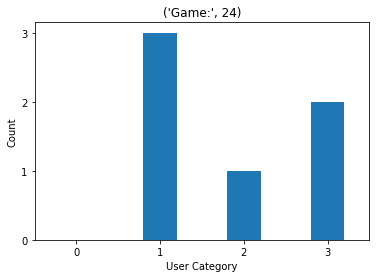

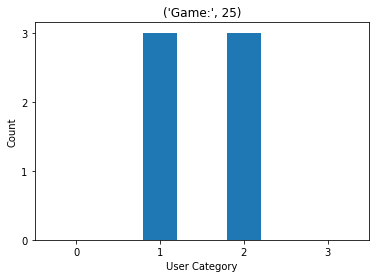

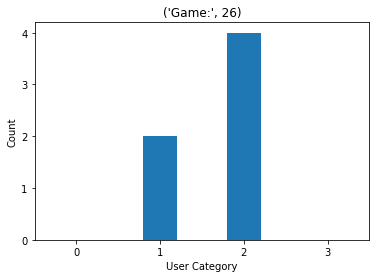

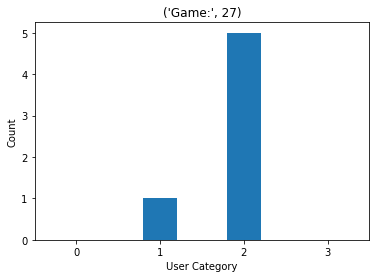

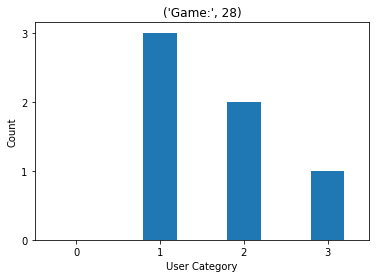

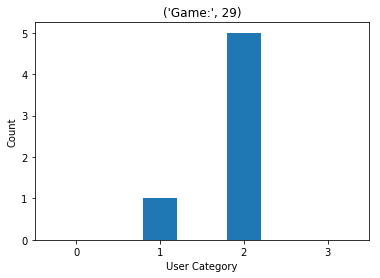

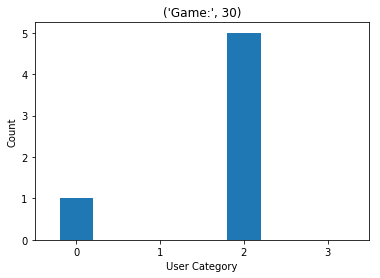

In [29]:
category_vil = categories(contr_vil, user_vil, 'category4')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


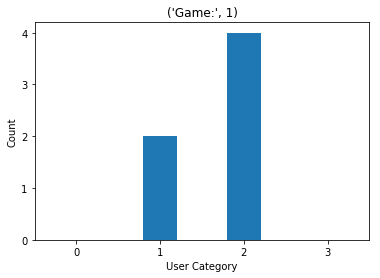

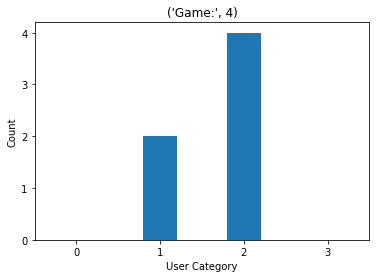

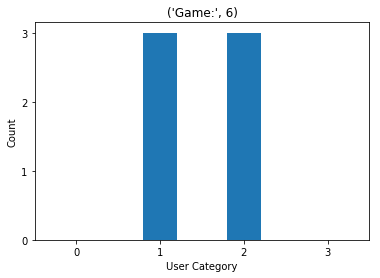

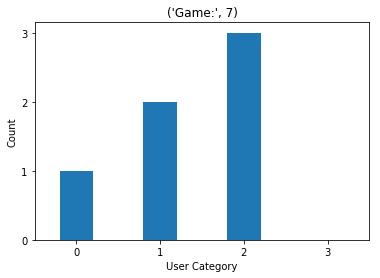

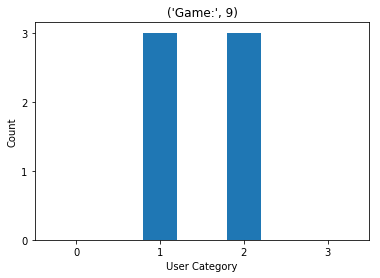

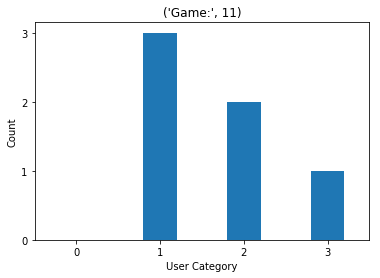

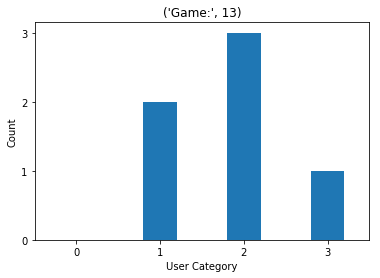

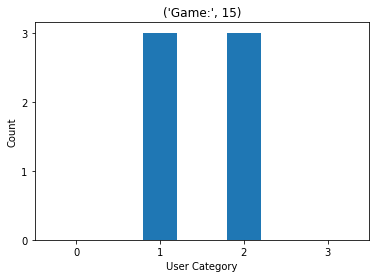

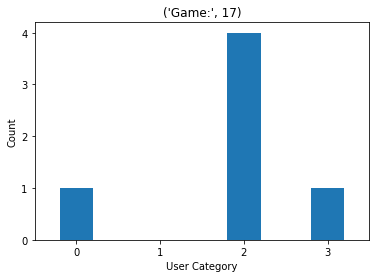

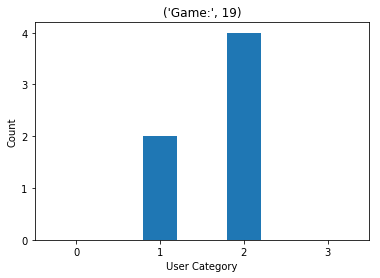

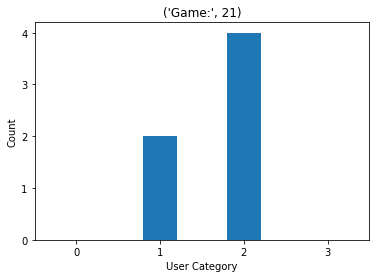

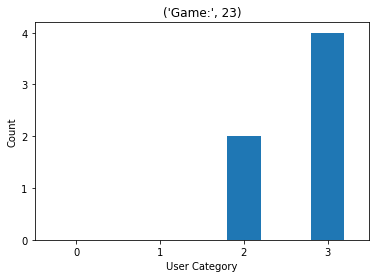

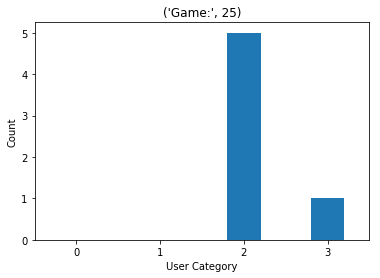

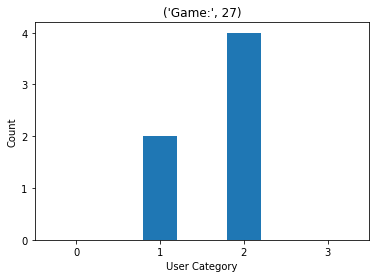

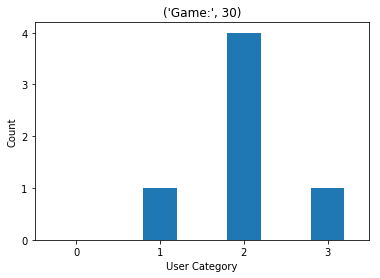

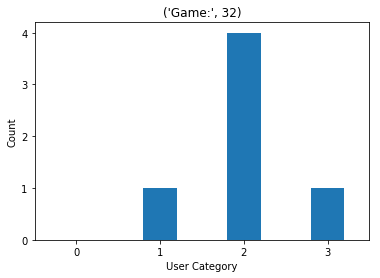

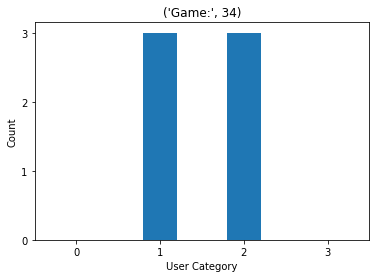

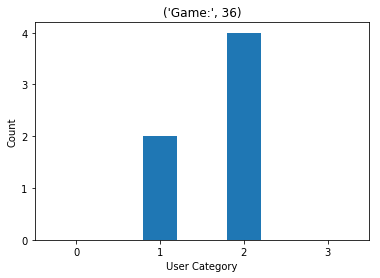

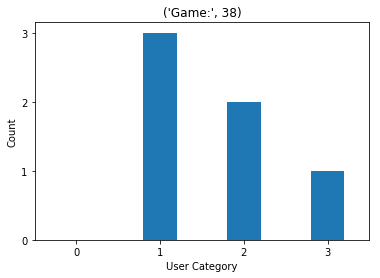

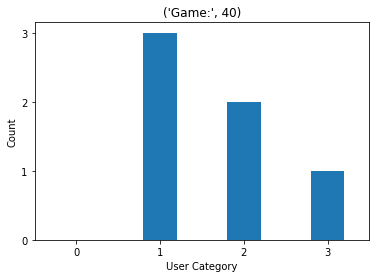

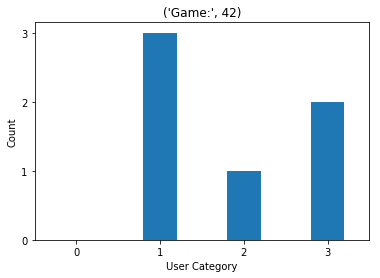

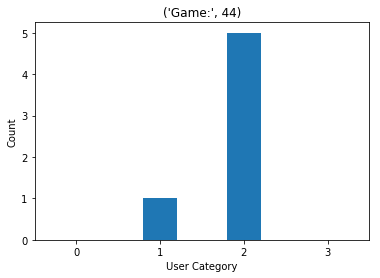

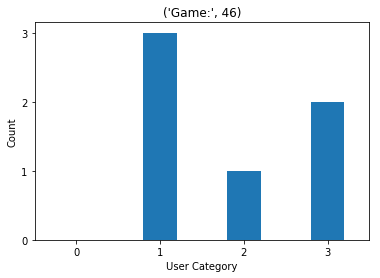

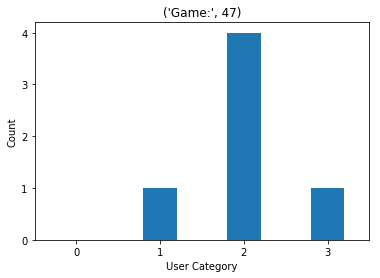

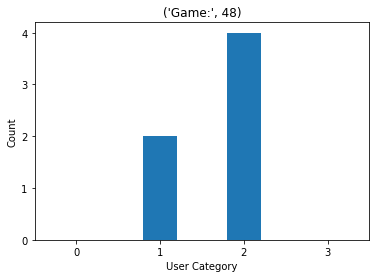

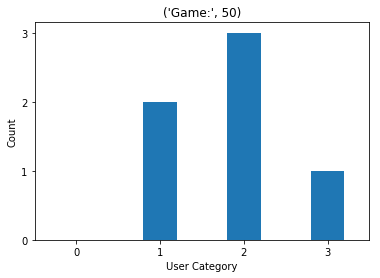

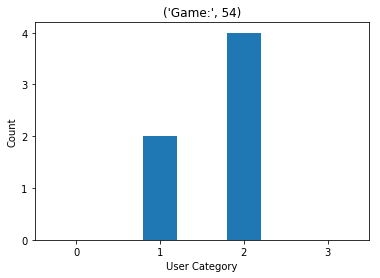

In [30]:
category_eq_dau = categories(eq_contr_dau, eq_user_dau,'category4')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


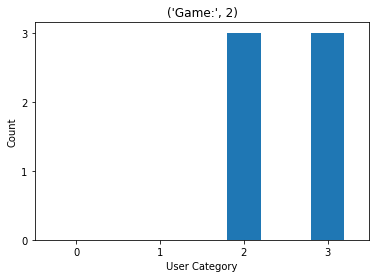

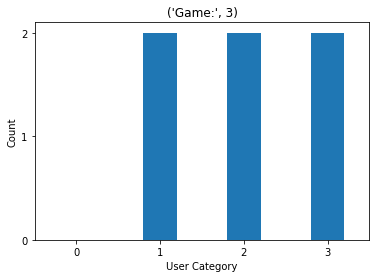

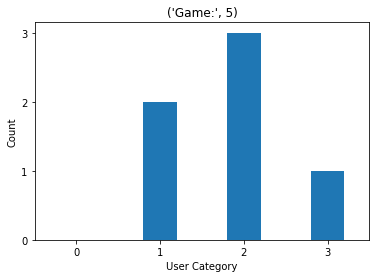

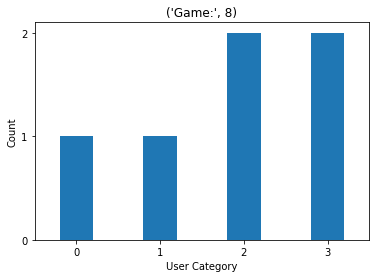

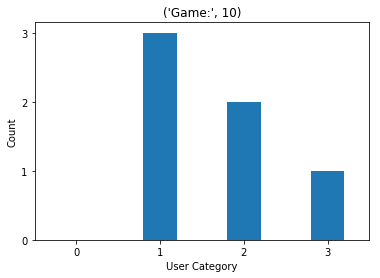

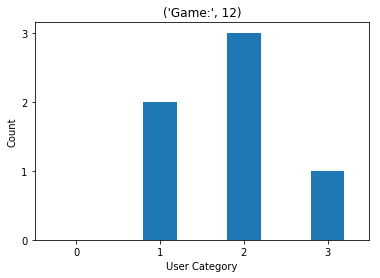

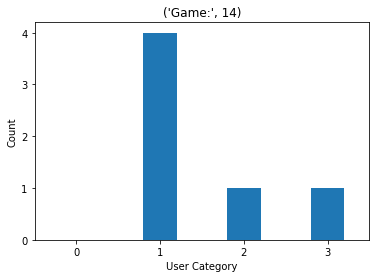

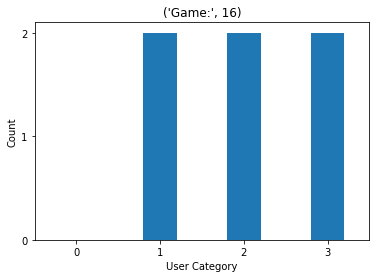

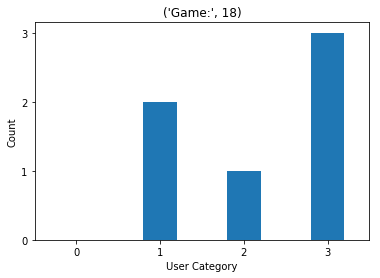

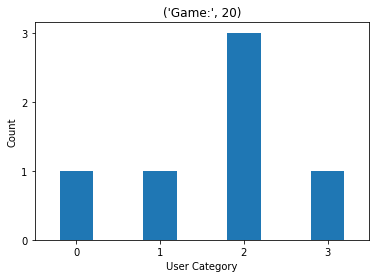

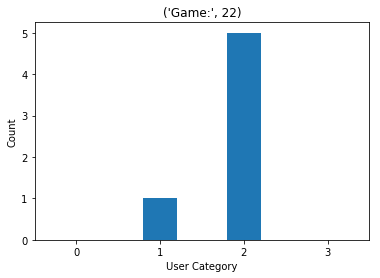

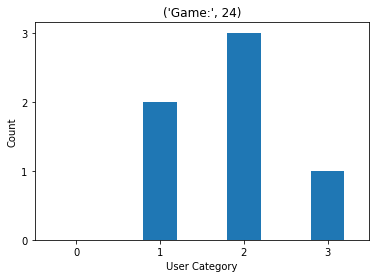

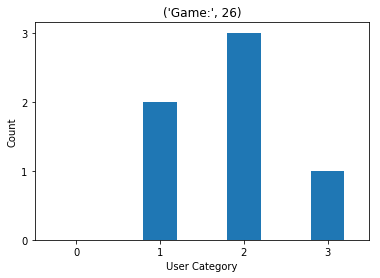

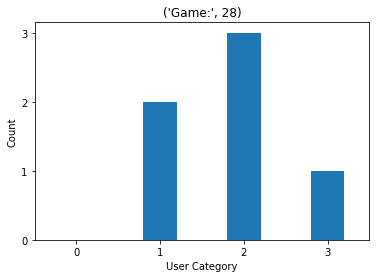

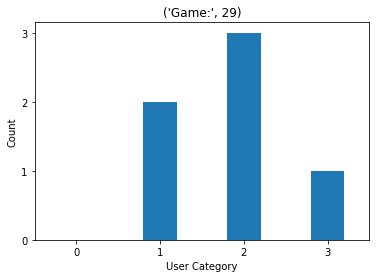

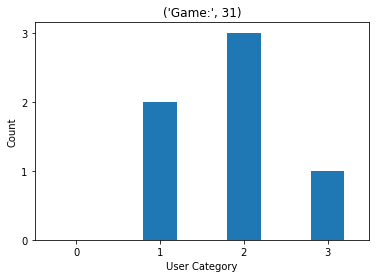

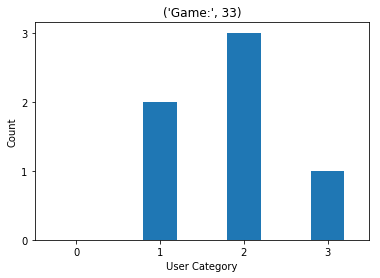

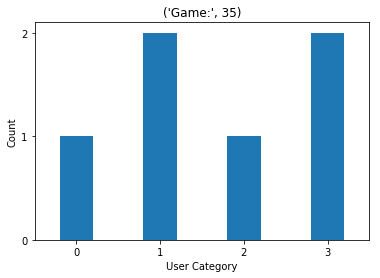

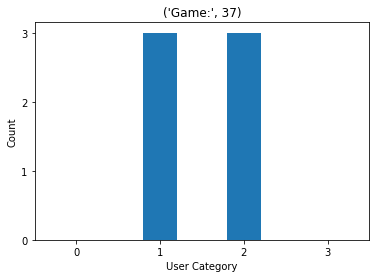

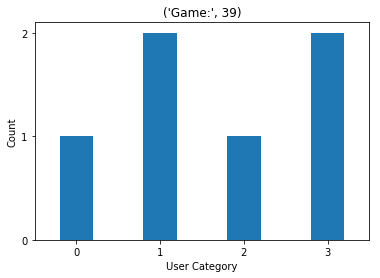

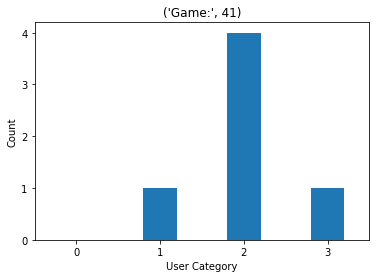

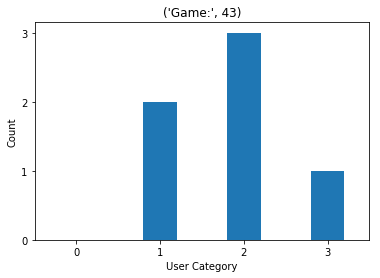

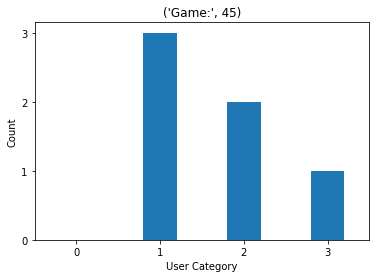

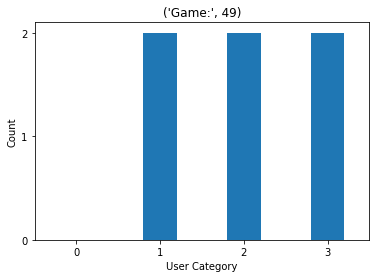

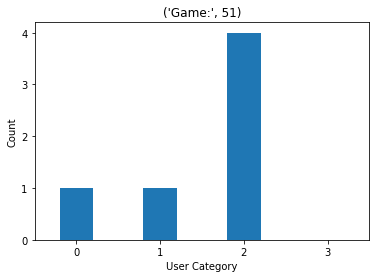

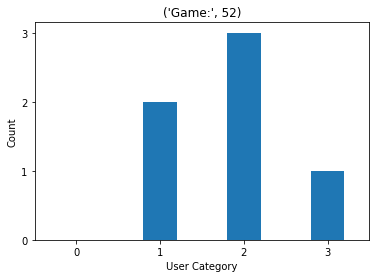

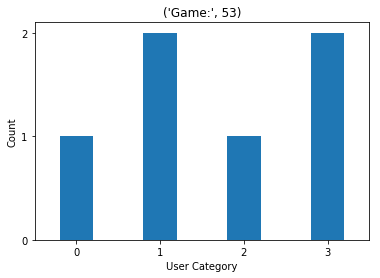

In [31]:
category_ineq_dau = categories(ineq_contr_dau, ineq_user_dau, 'category4')

In [67]:
#ineq_user_dau[ineq_user_dau.index.isin(category_ineq_dau[category_ineq_dau.category4==1]['user_id'])]['diners_inicials']

In [66]:
def richness(category_ds):
    df = category_ds
    conditions = [
        (df['diners_inicials'] == 20),
        (df['diners_inicials'] == 30),
        (df['diners_inicials'] == 40),
        (df['diners_inicials'] == 50),
        (df['diners_inicials'] == 60)]
    choices = [1, 2, 3,4,5]
    df['richness'] = np.select(conditions, choices, default='black')
    return (df)

In [32]:
df = category_street

In [38]:
conditions = [
    (df['diners_inicials'] < 40) ,
    (df['diners_inicials'] == 40),
    (df['diners_inicials'] > 40)]
choices = [1, 2, 3]
df['richness'] = np.select(conditions, choices, default='black')

In [52]:
conditions = [
    (df['diners_inicials'] == 20),
    (df['diners_inicials'] == 30),
    (df['diners_inicials'] == 40),
    (df['diners_inicials'] == 50),
    (df['diners_inicials'] == 60)]
choices = [1, 2, 3,4,5]
df['richness'] = np.select(conditions, choices, default='black')

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.bar(x.keys(),x,align='center',width = 0.4)
#ax.bar(np.array([0,1,2,3,4])+0.2, df.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
ax.set_xlabel('User Category')
ax.set_ylabel('Count')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim((0.5,3.5))
name = 'Game:',int(i)
ax.set_title(name)  

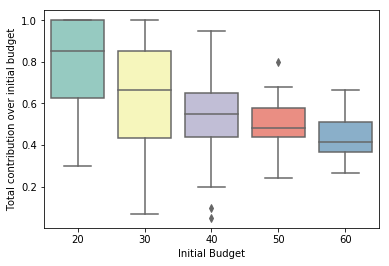

In [69]:
ax = sns.boxplot(x="diners_inicials", y="contr/budget", data=category_street, palette="Set3")
ax.set(xlabel='Initial Budget', ylabel='Total contribution over initial budget')
plt.show()

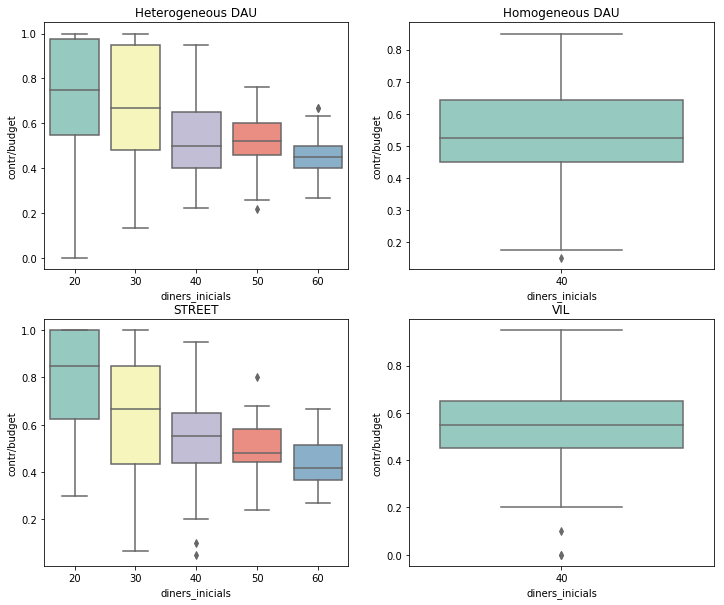

In [79]:
#fig, axs = plt.subplots(2, 2, figsize=(10, 8),sharex=False, sharey=True)

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(12,10))
sns.boxplot(x="diners_inicials", y="contr/budget", data=category_ineq_dau, palette="Set3", ax=axs[0,0]).set_title("Heterogeneous DAU")
sns.boxplot(x="diners_inicials", y="contr/budget", data=category_eq_dau, palette="Set3", ax=axs[0,1]).set_title("Homogeneous DAU")
sns.boxplot(x="diners_inicials", y="contr/budget", data=category_street, palette="Set3", ax=axs[1,0]).set_title("STREET")
sns.boxplot(x="diners_inicials", y="contr/budget", data=category_vil, palette="Set3", ax=axs[1,1]).set_title("VIL") 
    
plt.show()

### Classification according the genere:

In [107]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [108]:
def classification(contr_ds,data_genere):
    X = contr_ds
    y = data_genere
    X = np.asarray(contr_ds)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  
    #Logistic Regression
    kfold = model_selection.KFold(n_splits=5, random_state=7)
    logreg = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
    scoring = 'accuracy'
    results = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    logreg.fit(X_train, y_train)
    print('Accuracy of LogisticRegression classifier on training set: {:.2f}'
         .format(logreg.score(X_train, y_train)))
    print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
         .format(logreg.score(X_test, y_test)))
    ## Confusion matrix
    pred =logreg.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')
    ## Decision Tree
    tree = DecisionTreeClassifier()
    scoring = 'accuracy'
    results = model_selection.cross_val_score(tree, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    tree.fit(X_train, y_train)
    print('Accuracy of DecisionTree classifier on training set: {:.2f}'
         .format(tree.score(X_train, y_train)))
    print('Accuracy of DecisionTree classifier on test set: {:.2f}'
         .format(tree.score(X_test, y_test)))  
    ## Confusion matrix
    pred =tree.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')
    ## KNNeigbors    
    knn = KNeighborsClassifier()
    scoring = 'accuracy'
    results = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    knn.fit(X_train, y_train)
    print('Accuracy of KNN classifier on training set: {:.2f}'
         .format(knn.score(X_train, y_train)))
    print('Accuracy of KNN classifier on test set: {:.2f}'
         .format(knn.score(X_test, y_test)))
    ## Confusion matrix
    pred =knn.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')
    ## Linear Discriminant Analysis     
    lda = LinearDiscriminantAnalysis()
    results = model_selection.cross_val_score(lda, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    lda.fit(X_train, y_train)
    print('Accuracy of LDA classifier on training set: {:.3f}'
         .format(lda.score(X_train, y_train)))
    print('Accuracy of LDA classifier on test set: {:.3f}'
         .format(lda.score(X_test, y_test)))
    ## Confusion matrix
    pred =lda.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')
    ## Linear Discriminant Analysis  
    gnb = GaussianNB()
    results = model_selection.cross_val_score(gnb, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    gnb.fit(X_train, y_train)
    print('Accuracy of GNB classifier on training set: {:.3f}'
         .format(gnb.score(X_train, y_train)))
    print('Accuracy of GNB classifier on test set: {:.3f}'
         .format(gnb.score(X_test, y_test)))
    ## Confusion matrix
    pred =gnb.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')
    ## Support Vector Machine   
    svm = SVC()
    results = model_selection.cross_val_score(svm, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    svm.fit(X_train, y_train)
    print('Accuracy of SVM classifier on training set: {:.3f}'
         .format(svm.score(X_train, y_train)))
    print('Accuracy of SVM classifier on test set: {:.3f}'
         .format(svm.score(X_test, y_test)))
    ## Confusion matrix
    pred = svm.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

In [109]:
### STREET:
classification(contr_street_norm,ds_2_street.genere)

5-fold cross validation average accuracy: 0.499
Accuracy of LogisticRegression classifier on training set: 0.64
Accuracy of LogisticRegression classifier on test set: 0.32
[[ 7  4]
 [11  0]]
             precision    recall  f1-score   support

          0       0.39      0.64      0.48        11
          1       0.00      0.00      0.00        11

avg / total       0.19      0.32      0.24        22



5-fold cross validation average accuracy: 0.510
Accuracy of DecisionTree classifier on training set: 1.00
Accuracy of DecisionTree classifier on test set: 0.50
[[9 2]
 [9 2]]
             precision    recall  f1-score   support

          0       0.50      0.82      0.62        11
          1       0.50      0.18      0.27        11

avg / total       0.50      0.50      0.44        22



5-fold cross validation average accuracy: 0.580
Accuracy of KNN classifier on training set: 0.76
Accuracy of KNN classifier on test set: 0.50
[[8 3]
 [8 3]]
             precision    recall  f1-score 

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [110]:
### VIL:
classification(contr_vil_norm,ds_2_vil.genere)

5-fold cross validation average accuracy: 0.709
Accuracy of LogisticRegression classifier on training set: 0.74
Accuracy of LogisticRegression classifier on test set: 0.83
[[30  1]
 [ 5  0]]
             precision    recall  f1-score   support

          0       0.86      0.97      0.91        31
          1       0.00      0.00      0.00         5

avg / total       0.74      0.83      0.78        36



5-fold cross validation average accuracy: 0.597
Accuracy of DecisionTree classifier on training set: 0.99
Accuracy of DecisionTree classifier on test set: 0.67
[[23  8]
 [ 4  1]]
             precision    recall  f1-score   support

          0       0.85      0.74      0.79        31
          1       0.11      0.20      0.14         5

avg / total       0.75      0.67      0.70        36



5-fold cross validation average accuracy: 0.701
Accuracy of KNN classifier on training set: 0.75
Accuracy of KNN classifier on test set: 0.86
[[31  0]
 [ 5  0]]
             precision    recall  f

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [113]:
### Homogeneous DAU:
classification(eq_contr_dau_norm,ds_2_dau[ds_2_dau.user_id.isin(eq_contr_dau_norm.index)].genere)

5-fold cross validation average accuracy: 0.581
Accuracy of LogisticRegression classifier on training set: 0.66
Accuracy of LogisticRegression classifier on test set: 0.45
[[12  4]
 [14  3]]
             precision    recall  f1-score   support

          0       0.46      0.75      0.57        16
          1       0.43      0.18      0.25        17

avg / total       0.44      0.45      0.41        33



5-fold cross validation average accuracy: 0.621
Accuracy of DecisionTree classifier on training set: 1.00
Accuracy of DecisionTree classifier on test set: 0.58
[[11  5]
 [ 9  8]]
             precision    recall  f1-score   support

          0       0.55      0.69      0.61        16
          1       0.62      0.47      0.53        17

avg / total       0.58      0.58      0.57        33



5-fold cross validation average accuracy: 0.604
Accuracy of KNN classifier on training set: 0.75
Accuracy of KNN classifier on test set: 0.42
[[10  6]
 [13  4]]
             precision    recall  f

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [114]:
### Heterogeneous DAU:
classification(ineq_contr_dau_norm,ds_2_dau[ds_2_dau.user_id.isin(ineq_contr_dau_norm.index)].genere)

5-fold cross validation average accuracy: 0.520
Accuracy of LogisticRegression classifier on training set: 0.64
Accuracy of LogisticRegression classifier on test set: 0.67
[[17  3]
 [ 8  5]]
             precision    recall  f1-score   support

          0       0.68      0.85      0.76        20
          1       0.62      0.38      0.48        13

avg / total       0.66      0.67      0.65        33



5-fold cross validation average accuracy: 0.496
Accuracy of DecisionTree classifier on training set: 0.99
Accuracy of DecisionTree classifier on test set: 0.64
[[11  9]
 [ 3 10]]
             precision    recall  f1-score   support

          0       0.79      0.55      0.65        20
          1       0.53      0.77      0.62        13

avg / total       0.68      0.64      0.64        33



5-fold cross validation average accuracy: 0.543
Accuracy of KNN classifier on training set: 0.69
Accuracy of KNN classifier on test set: 0.55
[[12  8]
 [ 7  6]]
             precision    recall  f

#### Violin plot of the mean contribution according to genere:

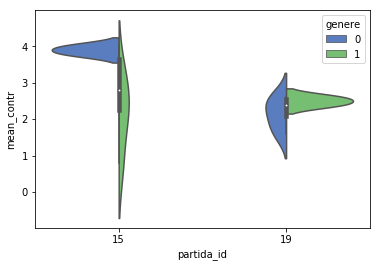

In [17]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==7]['partida_id']))])

We see opposite tendencies in both games. While in game 15 women have a wide range of mean contributions and men are who contribute around 4, in game 19 men exibit a wider range and women contrute a mean of 2.5.

### GAME 19:

#### Contribution table

In [18]:
##Analysis game 19: 
contr_game19 = contr_street.loc[user_street[user_street.partida_id==19]['user_id'],:]
contr_game19

ronda_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
117,4,2,4,2,2,2,0,0,0,0
118,2,2,2,2,4,4,4,2,0,4
119,2,4,4,4,4,4,2,0,0,0
120,2,2,4,4,4,0,4,0,0,0
121,2,2,4,4,4,4,2,2,2,0
122,4,2,2,2,2,4,2,0,2,4


#### Evolution of contributions:

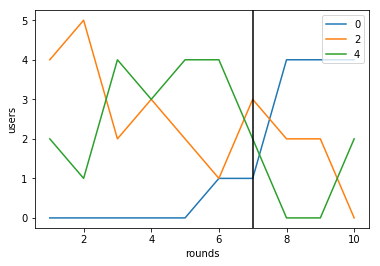

In [19]:
# STREET game 19:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, contr_game19[contr_game19 == 0].count(),label="0")
ax.plot(x, contr_game19[contr_game19 == 2].count(),label="2")
ax.plot(x, contr_game19[contr_game19 == 4].count(),label="4")
ax.axvline(x=7, c = "black")
plt.xlabel('rounds')
plt.ylabel('users')
plt.legend()
plt.show()

In [133]:
user_street[user_street.partida_id==19]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
116,117,Chusco,31000,h,36,r4,NaN,r1,r3,r2,...,False,False,19,0,1,r3,r4,44,10,0
117,118,Teo,8850,h,25,r6,NaN,r1,r2,r2,...,False,False,19,0,4,r1,r1,4,10,0
118,119,Eva Ruiz,8015,d,37,r6,NaN,NaN,NaN,NaN,...,False,False,19,0,5,NaN,NaN,16,10,1
119,120,Lobo,8003,h,44,r5,NaN,r1,r2,r2,...,False,False,19,0,3,r3,r3,0,10,0
120,121,Ale,8028,d,28,r6,NaN,r1,r3,r1,...,False,True,19,0,6,r2,r3,14,10,0
121,122,Ruth,8320,h,28,r5,NaN,r1,r2,r2,...,True,False,19,0,2,r2,r3,26,10,0


In game 19 we have that 2/3 of participants are males and 1/3 females. In this game all players had an university degree. 

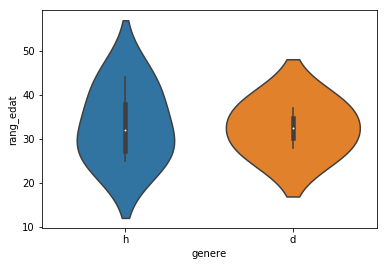

In [21]:
ax = sns.violinplot(x="genere", y="rang_edat", data=user_street[user_street.partida_id==19],
               order=["h", "d"])
plt.show()

In [134]:
user_street[user_street.user_id ==120]['diners_inicials']
#A user having 50 follows an altruist behavior. Final gain: 10um

119    20
Name: diners_inicials, dtype: int64

### GAME 15:

#### Contribution table

In [22]:
##Analysis game 15: 
contr_game15 = contr_street.loc[user_street[user_street.partida_id==15]['user_id'],:]
contr_game15

ronda_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
87,4,4,4,4,4,4,4,4,4,4
88,4,4,4,2,4,2,4,0,0,0
89,2,2,0,2,2,0,0,0,0,0
90,2,4,4,4,4,4,4,4,4,4
91,4,4,2,4,4,2,2,0,0,0
92,2,2,4,4,2,4,4,2,4,4


### Normalized result: 
Whatching at the sum of the normalized contributions we see that the one that the one that has a higher initial budget contributes proportionally less. This result is much smaller as there are three users that contributes a lot besides the objectives was fulfilled. 

In [23]:
contr_game15_n = contr_street_norm.loc[user_street[user_street.partida_id==15]['user_id'],:]
contr_game15_n.sum(axis=1)

user_id
87    8.000000
88    8.000000
89    4.000000
90    9.500000
91    3.666667
92    8.000000
dtype: float64

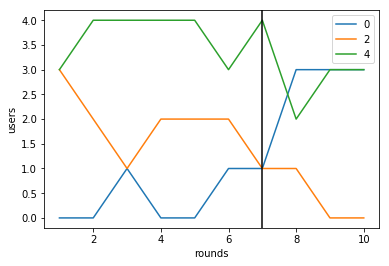

In [24]:
# STREET game 15:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, contr_game15[contr_game15 == 0].count(),label="0")
ax.plot(x, contr_game15[contr_game15 == 2].count(),label="2")
ax.plot(x, contr_game15[contr_game15 == 4].count(),label="4")
plt.xlabel('rounds')
plt.ylabel('users')
ax.axvline(x=7, c = "black")
plt.legend()

In five rounds there were four users that contribute 4 to the common fond. We have a free rider in this game (four contributions of 2 and six of 0). It seems that the user contributes 2 whatching the rest of players and finally opt for 0 having the other player contributing 4 in all rounds.
In this game we have three users that behave altruistic. These players are: 87, 90, 92

In [25]:
user_street[user_street.partida_id==15]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
86,87,Yoconozco@yahoo.es,8012,h,43,r6,NaN,r1,r1,r1,...,False,False,15,0,5,r1,r4,10,10,0
87,88,Mayesta,8003,d,41,r6,NaN,r1,r1,r2,...,False,False,15,0,2,r1,r4,6,10,0
88,89,Yo,2001,d,36,r6,NaN,r1,r2,r2,...,True,True,15,0,3,r1,r3,12,9,0
89,90,Jose,8001,h,31,r6,NaN,r1,r1,r2,...,False,False,15,0,1,r1,r4,2,10,0
90,91,PICADILLO,8010,d,41,r6,NaN,r1,r1,r2,...,False,False,15,0,6,r3,r4,38,10,1
91,92,Jess,13055,d,32,r6,NaN,r1,r3,r2,...,False,False,15,0,4,r1,r3,8,10,0


#### Altruistic:

In [26]:
user_street[user_street.user_id == 87]['diners_inicials']
#A user having 50 follows an altruist behavior. Final gain: 10um

86    50
Name: diners_inicials, dtype: int64

In [27]:
user_street[user_street.user_id == 90]['diners_inicials']

89    40
Name: diners_inicials, dtype: int64

In [28]:
user_street[user_street.user_id == 92]['diners_inicials']

91    40
Name: diners_inicials, dtype: int64

#### Free-Rider:

In [29]:
user_street[user_street.user_id == 89]['diners_inicials']
#The free rider had the minimum initial budget. Final gain: 16um

88    20
Name: diners_inicials, dtype: int64

In game 19 we have that 2/3 of participants are males and 1/3 females. All participants had university degree. 

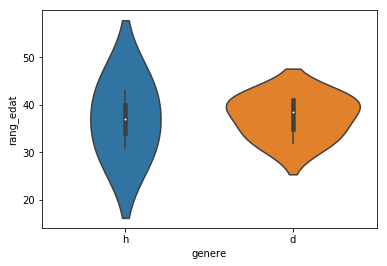

In [30]:
ax = sns.violinplot(x="genere", y="rang_edat", data=user_street[user_street.partida_id==15],
               order=["h", "d"])
plt.show()

## Ending at round 8:

### STREET DATABASE

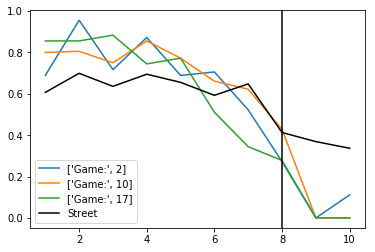

In [31]:
ending_game(final_street, contr_street_norm, user_street, 8,"Street")

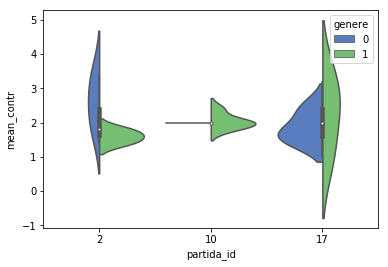

In [32]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==8]['partida_id']))])


### GAME 10:

In [34]:
## Game 10 - ending at round 8
user_street[user_street.partida_id==10]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
55,56,Ant,8006,d,17,r3,NaN,r1,r2,r2,...,False,True,10,0,4,r1,r4,20,10,0
56,57,Maria,8006,d,17,r4,NaN,r1,r2,r2,...,True,True,10,0,5,r1,r3,22,10,0
57,58,Irina,8006,d,17,r3,NaN,r1,r2,r2,...,False,False,10,0,1,r2,r2,10,10,0
58,59,Paloma,8034,d,44,r4,NaN,r1,r2,r4,...,True,False,10,0,2,r1,r2,0,10,0
59,60,Monica,8023,d,20,r4,NaN,r1,r1,r2,...,False,False,10,0,3,r1,r1,36,10,1
60,61,Pau,8840,h,26,r7,NaN,r1,r1,r1,...,False,True,10,0,6,r3,r2,30,10,0


#### Contribution table:

In [35]:
##Analysis game 10: 
contr_game10 = contr_street.loc[user_street[user_street.partida_id==10]['user_id'],:]
contr_game10

ronda_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
56,2,4,2,4,4,0,4,0,0,0
57,2,2,4,4,2,2,0,2,0,0
58,2,4,4,2,2,4,2,0,0,0
59,4,4,2,2,2,2,2,2,0,0
60,2,0,4,4,4,2,4,4,0,0
61,4,0,0,4,4,4,2,2,0,0


In [36]:
contr_game10_n = contr_street_norm.loc[user_street[user_street.partida_id==10]['user_id'],:]
print(contr_game10_n.sum(axis=1))

user_id
56     5.000000
57     4.500000
58     6.666667
59    10.000000
60     4.000000
61     4.000000
dtype: float64


#### Altruistic:

In [37]:
user_street[user_street.user_id == 59]['diners_inicials']

58    20
Name: diners_inicials, dtype: int64

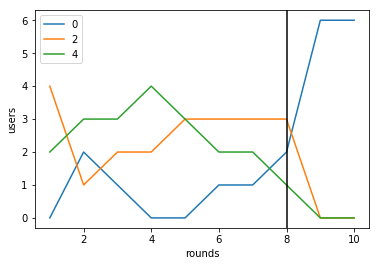

In [38]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, contr_game10[contr_game10 == 0].count(),label="0")
ax.plot(x, contr_game10[contr_game10 == 2].count(),label="2")
ax.plot(x, contr_game10[contr_game10 == 4].count(),label="4")

plt.xlabel('rounds')
plt.ylabel('users')
ax.axvline(x=8, c = "black")
plt.legend()


### GAME 2: 

Users Information:
    user_id nickname  codi_postal genere  rang_edat nivell_estudis  prfinal0  \
6         7     Aure         8025      d         26             r6       NaN   
7         8   MercÃ¨         8022      d         41             r6       NaN   
8         9     Coia         8016      h         57             r6       NaN   
9        10  Miranfu         8008      d         47             r6       NaN   
10       11      SvK         8197      h         38             r6       NaN   
11       12  Marieta         8205      h         62             r6       NaN   

   prfinal1 prfinal2 prfinal3   ...   check_2 check_3 partida_id is_robot  \
6        r1       r2       r2   ...     False   False          2        0   
7        r1       r2       r2   ...     False   False          2        0   
8        r1       r2       r2   ...     False   False          2        0   
9        r1       r2       r1   ...     False   False          2        0   
10       r1       r1       r1   ...

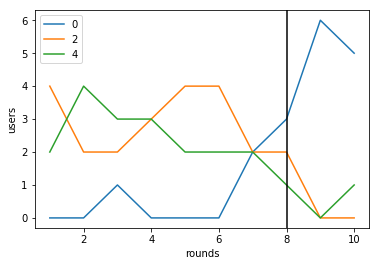

In [39]:
game_anal(contr_street,contr_street_norm,user_street,2,8)

#### Altruistic:

In [40]:
user_street[user_street.user_id == 9]['diners_inicials']

8    20
Name: diners_inicials, dtype: int64

### GAME 17

Users Information:
     user_id         nickname  codi_postal genere  rang_edat nivell_estudis  \
103      104  Rata laboratori         8030      h         32             r5   
104      105         Wagingey        17251      d         37             r6   
105      106           rraaps         8030      d         53             r6   
106      107             aiwa         8003      d         39             r6   
107      108            Ninyo        17200      h         45             r5   
108      109         Santiago         8030      h         53             r6   

     prfinal0 prfinal1 prfinal2 prfinal3   ...   check_2 check_3 partida_id  \
103       NaN       r1       r1       r2   ...     False    True         17   
104       NaN       r1       r3       r2   ...     False   False         17   
105       NaN       r1       r1       r1   ...     False   False         17   
106       NaN       r1       r2       r4   ...     False   False         17   
107       NaN       r1       r2 

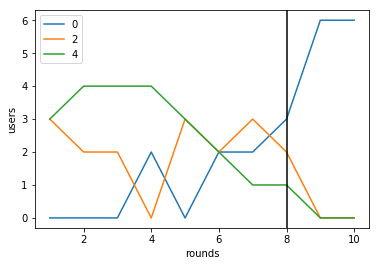

In [41]:
game_anal(contr_street,contr_street_norm, user_street, 17,8)

#### Altruistic: 

In [42]:
user_street[user_street.user_id == 106]['diners_inicials']

105    60
Name: diners_inicials, dtype: int64

In [43]:
user_street[user_street.user_id == 107]['diners_inicials']

106    40
Name: diners_inicials, dtype: int64

In [44]:
user_street[user_street.user_id == 108]['diners_inicials']

107    20
Name: diners_inicials, dtype: int64

## Ending at round 9:

### STREET DATABASE

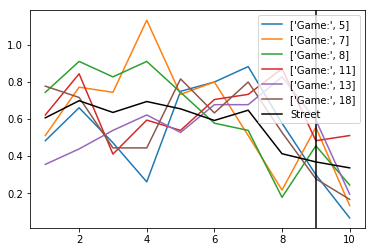

In [45]:
ending_game(final_street, contr_street_norm, user_street, 9,"Street")

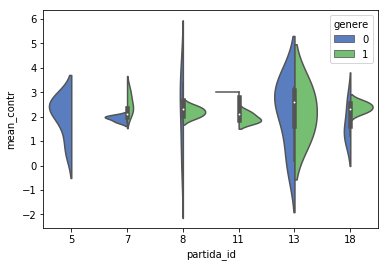

In [46]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==9]['partida_id']))])


## Ending at round 10:

### STREET DATABASE

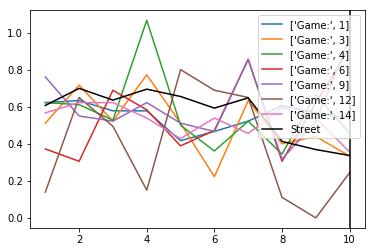

In [47]:
ending_game(final_street, contr_street_norm, user_street, 10,"Street")

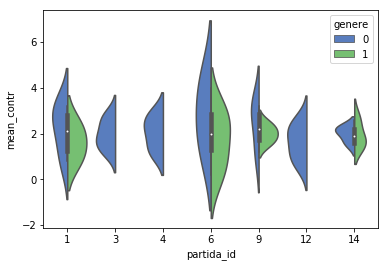

In [48]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==10]['partida_id']))])


### GAME 6:

#### Mean Contribution of game 6:

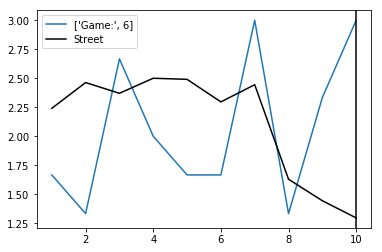

In [49]:
final = final_street[final_street.partida_id == 6]
mean_contr_street= contr_street.mean(axis=0)
#Plot
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)

for i in final.partida_id.unique():
    game_contr = contr_street.loc[list(user_street[user_street.partida_id==i].user_id),:]
    mean_contr_game = game_contr.describe().loc['mean',:]
    ax.plot(x, mean_contr_game, label=["Game:",i])

ax.plot(x, mean_contr_street,label='Street',c = 'black')
ax.axvline(x=10, c = "black")
plt.legend()

Users Information:
    user_id nickname  codi_postal genere  rang_edat nivell_estudis  prfinal0  \
31       32    Lluna         8193      d         17             r4       NaN   
32       33    Heras         8197      h         17             r3       NaN   
33       34    Mekii         8820      d         17             r5       NaN   
34       35  Celiamp         8024      d         16             r3       NaN   
35       36   Nuriam         8031      d         17             r3       NaN   
36       37    Marcb         8100      h         16             r3       NaN   

   prfinal1 prfinal2 prfinal3   ...   check_2 check_3 partida_id is_robot  \
31       r1       r1       r3   ...     False   False          6        0   
32       r1       r2       r2   ...     False   False          6        0   
33       r1       r2       r4   ...      True    True          6        0   
34       r1       r1       r4   ...     False    True          6        0   
35       r1       r1       r2   ...

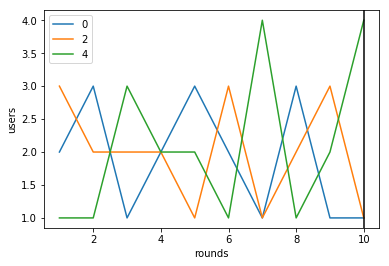

In [50]:
game_anal(contr_street,contr_street_norm,user_street, 6, 10)

#### Altruistic:

In [51]:
user_street[user_street.user_id == 32]['diners_inicials']

31    30
Name: diners_inicials, dtype: int64

In [52]:
user_street[user_street.user_id == 37]['diners_inicials']

36    20
Name: diners_inicials, dtype: int64

In [53]:
user_street[user_street.user_id == 33]['diners_inicials']

32    60
Name: diners_inicials, dtype: int64

#### Free Riding:

In [54]:
user_street[user_street.user_id == 34]['diners_inicials']

33    40
Name: diners_inicials, dtype: int64

## Ending at round 7:

### VIL DATABASE

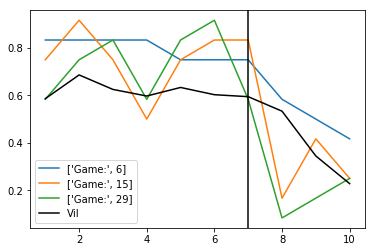

In [55]:
ending_game(final_vil, contr_vil_norm, user_vil, 7,"Vil")

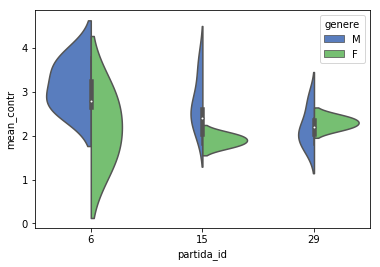

In [56]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==7]['partida_id']))])


### GAME 6:

#### Contribution table

In [57]:
##Analysis game 6: 
contr_game6 = contr_vil.loc[user_vil[user_vil.partida_id==6]['user_id'],:]
contr_game6

ronda_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
31,4,4,4,4,4,4,4,2,2,2
32,2,4,4,2,2,2,2,4,4,2
33,2,4,4,2,2,2,0,0,0,0
34,4,2,2,4,2,4,4,4,0,0
35,4,4,4,4,4,4,4,4,4,2
36,4,2,2,4,4,2,4,0,2,4


#### Evolution of contribution

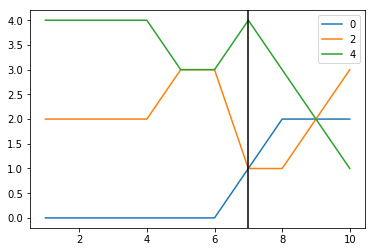

In [58]:
# VIL game 6:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, contr_game6[contr_game6 == 0].count(),label="0")
ax.plot(x, contr_game6[contr_game6 == 2].count(),label="2")
ax.plot(x, contr_game6[contr_game6 == 4].count(),label="4")
ax.axvline(x=7, c = "black")
plt.legend()
plt.show()

In this case we don't have free riders. There are two persons that contributes closed to perfect altruist. 

In [59]:
user_vil[user_vil.partida_id==6]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,situacio_laboral,estat_civil,num_jugador,acabat,...,prfinal5,prfinal6,prfinal7,prfinal8,prfinal9,prfinal10,prfinal11,prfinal12,prfinal13,bots
30,31,Bernaz,8840,M,r7,r2,r1,r2,5.0,1,...,r2,r6,r3,r5,r4,r2,r2,r1 r2,Comercio\r\r,0
31,32,Yolanda,8840,F,r5,r2,r1,r2,4.0,1,...,r1,na,r3,r3,r1,r2,r1,r5,Arreglar pavimento y mas verde le falta luz en...,0
32,33,Macame,8840,F,r5,r6,r3,r5,3.0,1,...,r1,na,r4,r5,r4,r2,r2,r1,Tiendas.,0
33,34,cristicoteca,8840,M,r5,r6,r3,r2,1.0,1,...,r2,r2 r3 r4 r11,r4,r4,r1,r1,r2,r1 r2 r4,Mes botigues,0
34,35,Juanmi,8840,M,r5,r2,r3,r2,2.0,1,...,r2,r4 r5 r6 r7 r8,r3,r3,r1,r1,r2,r1,Míçs tranquilidad,0
35,36,Toni,8840,M,r5,r5,r3,r2,6.0,1,...,r1,na,r5,r4,r1,r1,r2,r2,Restrincon del trafico,0


### GAME 15:

#### Contribution table

In [60]:
##Analysis game 15: 
contr_game15 = contr_vil.loc[user_vil[user_vil.partida_id==15]['user_id'],:]
contr_game15

ronda_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
86,2,4,0,4,2,4,0,0,2,2
87,4,2,4,0,2,4,4,2,0,0
88,4,4,4,4,4,4,4,0,4,4
89,4,4,2,0,4,4,4,0,4,0
90,2,4,4,4,2,4,4,2,0,0
91,2,4,4,0,4,0,4,0,0,0


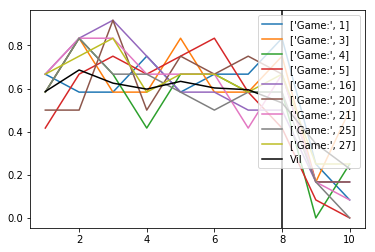

In [37]:
ending_game(final_vil, contr_vil_norm, user_vil, 8,"Vil")

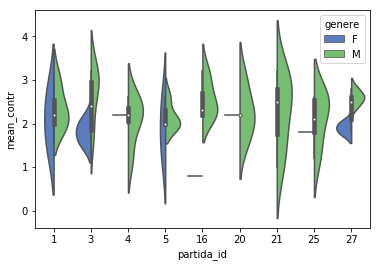

In [38]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==8]['partida_id']))])


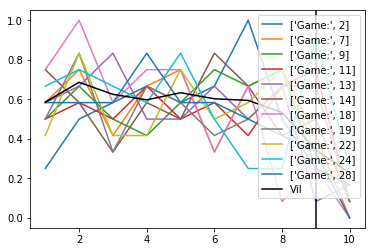

In [39]:
ending_game(final_vil, contr_vil_norm, user_vil, 9,"Vil")

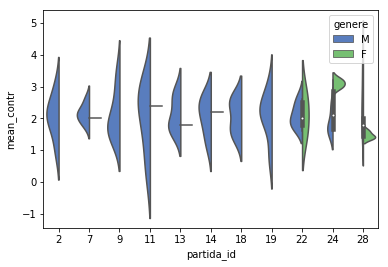

In [40]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==9]['partida_id']))])


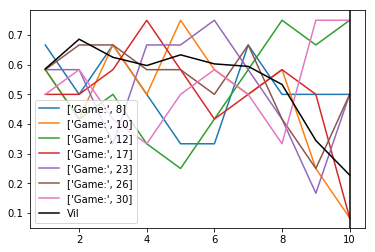

In [41]:
ending_game(final_vil, contr_vil_norm, user_vil, 10,"Vil")

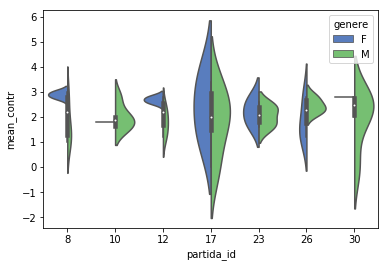

In [42]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==10]['partida_id']))])


In [43]:
## STREET case: 
## How many games finish at round 7?
final7 = final_street[final_street.ronda_obj==7]
final7

,partida_id,ronda_obj
partida_id,,
15,15,7
19,19,7


In [44]:
## Game ending at round 7
game15_contr_s = contr_street_norm.loc[list(user_street[user_street.partida_id==15].user_id),:]
game19_contr_s = contr_street_norm.loc[list(user_street[user_street.partida_id==19].user_id),:]

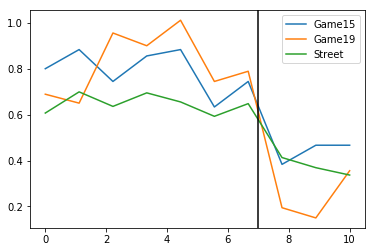

In [45]:
# Mean contribution per round
mean_contr_game15_s = game15_contr_s.describe().loc['mean',:]
mean_contr_game19_s = game19_contr_s.describe().loc['mean',:]
mean_contr_street= contr_street_norm.mean(axis=0)

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 10)
ax.plot(x, mean_contr_game15_s,label="Game15")
ax.plot(x, mean_contr_game19_s,label="Game19")
ax.plot(x, mean_contr_street,label="Street")
ax.axvline(x=7, c = "black")
plt.legend()

In [46]:
## How many games finish at round 7?
final8 = final_street[final_street.ronda_obj==8]
final8

,partida_id,ronda_obj
partida_id,,
2,2,8
10,10,8
17,17,8


In [39]:
## DAU case: 
## How many games finish at round 6?
final6 = final_dau[final_dau.ronda_obj==6]
## Game 2 is heterogeneous

## How many games finish at round 7?
final7 = final_dau[final_dau.ronda_obj==7]
## Games 3 and 12 are heterogeneous
## Games 23, 25 and 30 are heterogeneous

In [35]:
## How many games finish at round 8?
final8 = final_dau[final_dau.ronda_obj==8]
final8.shape

(15, 2)

In [36]:
## How many games finish at round 9?
final9 = final_dau[final_dau.ronda_obj==9]
final9.shape

(14, 2)

In [37]:
## How many games finish at round 10?
final10 = final_dau[final_dau.ronda_obj==10]
final10.shape

(19, 2)

In [38]:
### Partida 2 end the game in 6 rounds. Which users
final7.partida_id.unique

<bound method Series.unique of partida_id
3      3
12    12
23    23
25    25
30    30
Name: partida_id, dtype: int64>

In [50]:
list(ineq_user_dau[ineq_user_dau.partida_id==2].user_id)

[5, 9, 10, 11, 12, 14]

In [77]:
## Game ending at round 6
game2_contr = ineq_contr_dau_norm.loc[list(ineq_user_dau[ineq_user_dau.partida_id==2].user_id),:]*10
game2_contr.describe().loc['mean',:]

ronda_id
1     0.841667
2     1.050000
3     0.952778
4     1.077778
5     0.786111
6     0.655556
7     0.525000
8     0.461111
9     0.816667
10    0.416667
Name: mean, dtype: float64

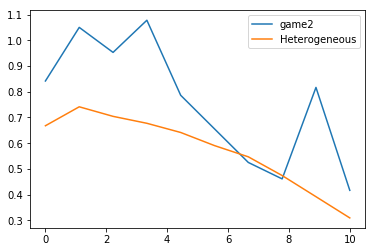

In [80]:
# Mean contribution per round
mean_contr_game2 = game2_contr.describe().loc['mean',:]
mean_contr_ineq= ineq_contr_dau_norm.mean(axis=0)*10

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 10)
ax.plot(x, mean_contr_game2,label="game2")
ax.plot(x, mean_contr_ineq,label="Heterogeneous")

plt.legend()

### Socio-demographic exploration: 

In [49]:
### PCA: 
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
#X = ds_2_dau.iloc[:,-15:].fillna(0)

X = contr_street_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

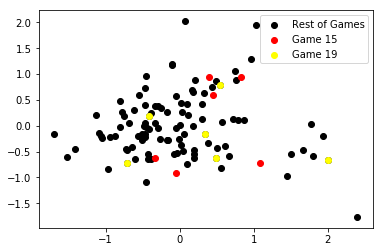

In [51]:
### Pintar jugadores por partida
X = contr_street_norm
y = ds_2_street.loc[:,"partida_id"]

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

plt.scatter(transformed[y!=15 ][0], transformed[y!=15 ][1], label='Rest of Games', c='black')
plt.scatter(transformed.loc[y==15][0], transformed.loc[y==15][1], label='Game 15', c='red')
plt.scatter(transformed.loc[y==19][0], transformed.loc[y==19][1], label='Game 19', c='yellow')
#plt.scatter(transformed[y!=15 or y!=19][0], transformed[y!=15 or y!=19][1], label='Rest of Games', c='black')

plt.legend()
plt.show()

In [23]:
clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
users_clust3 = list(clust3.index)

#user_street = pd.read_csv("dades/dades_csv/climatestreet/game_user.csv", delimiter=',' , encoding="latin-1")
#user_street.drop(user_street.index[3], inplace=True)
din_in_clust1 = user_street[user_street['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_street[user_street['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_street[user_street['user_id'].isin(users_clust3)]['diners_inicials']



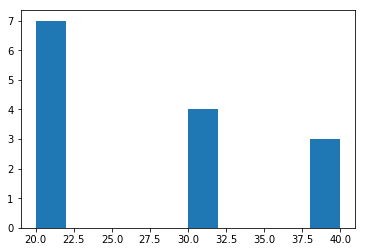

In [24]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [ ]:
din_in_clust1 = ds_2_street[user_street['user_id'].isin(users_clust1)]['genere']
din_in_clust2 = user_street[user_street['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_street[user_street['user_id'].isin(users_clust3)]['diners_inicials']

In [52]:
ds_2_street.columns

Index(['user_id', 'partida_id', 'mean_contr', 'genere', 'rang_edat',
       'prfinal1', 'prfinal2', 'prfinal3', 'prfinal4', 'prfinal5', 'prfinal6',
       'prfinal7', 'prfinal8', 'prfinal9', 'prfinal10', 'prfinal11',
       'prfinal12', 'prfinal13', 'prfinal14', 'prfinal15'],
      dtype='object')

In [59]:
X_2_street = ds_2_street.iloc[:,-19:]

In [63]:
X_2_street= X_2_street.reindex(ds_2_street.iloc[:,0])

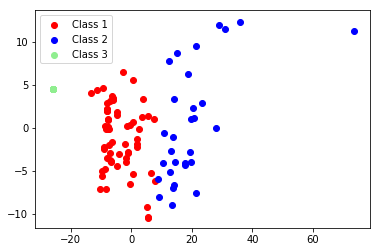

In [65]:
### PCA: 
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
#X = ds_2_dau.iloc[:,-15:].fillna(0)

X = X_2_street.fillna(0)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [65]:
user_street.head(10)

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
0,1,Test5,9000,d,56,r1,NaN,r1,r4,r3,...,False,False,1,0,3,r1,r4,8,10,0
1,2,Test2,12345,d,16,r2,NaN,r1,r3,r4,...,True,False,1,0,6,r3,r1,30,10,0
2,3,Test1,12345,h,12,r1,NaN,r1,r3,r1,...,True,False,1,0,4,r4,r3,32,10,1
3,4,Test3,12345,h,14,r1,NaN,r1,r1,r1,...,True,False,1,0,1,r3,r4,0,10,0
4,5,Test4,9000,h,55,r1,NaN,r1,r1,r1,...,True,False,1,0,5,r4,r3,28,10,0
5,6,Test6,12345,h,23,r2,NaN,r1,r1,r1,...,True,False,1,0,2,r2,r3,20,9,0
6,7,Aure,8025,d,26,r6,NaN,r1,r2,r2,...,False,False,2,0,2,r2,r2,26,10,1
7,8,MercÃ¨,8022,d,41,r6,NaN,r1,r2,r2,...,False,False,2,0,6,r1,r1,14,10,0
8,9,Coia,8016,h,57,r6,NaN,r1,r2,r2,...,False,False,2,0,1,r1,r3,2,10,0
9,10,Miranfu,8008,d,47,r6,NaN,r1,r2,r1,...,False,False,2,0,3,r3,r1,22,10,0


In [75]:
contr_street[contr_street.index.isin(user_street[user_street['genere']=='d']['user_id'])].sum(axis=1).describe()

count    44.000000
mean     20.590909
std       6.347745
min       2.000000
25%      17.500000
50%      22.000000
75%      24.000000
max      32.000000
dtype: float64

In [73]:
contr_street_norm[contr_street_norm.index.isin(user_street[user_street['genere']=='d']['user_id'])].sum(axis=1).describe()

count    44.000000
mean      5.677273
std       2.196389
min       0.500000
25%       4.000000
50%       5.416667
75%       7.375000
max      10.000000
dtype: float64

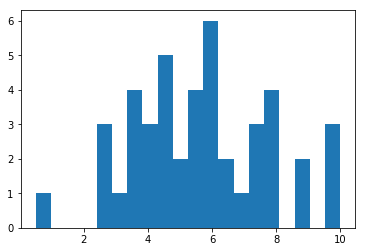

In [71]:
plt.hist(contr_street_norm[contr_street_norm.index.isin(user_street[user_street['genere']=='d']['user_id'])].sum(axis=1), bins=20)
plt.show()

In [76]:
contr_street[contr_street.index.isin(user_street[user_street['genere']=='h']['user_id'])].sum(axis=1).describe()

count    64.000000
mean     21.578125
std       8.594581
min       2.000000
25%      16.000000
50%      22.000000
75%      28.000000
max      40.000000
dtype: float64

In [74]:
contr_street_norm[contr_street_norm.index.isin(user_street[user_street['genere']=='h']['user_id'])].sum(axis=1).describe()

count    64.000000
mean      5.632292
std       2.329339
min       0.666667
25%       4.000000
50%       5.200000
75%       7.000000
max      10.000000
dtype: float64

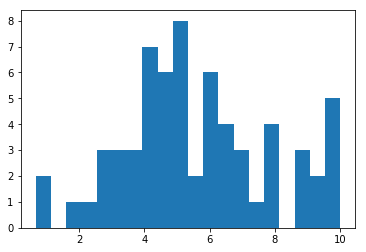

In [72]:
plt.hist(contr_street_norm[contr_street_norm.index.isin(user_street[user_street['genere']=='h']['user_id'])].sum(axis=1), bins=20)
plt.show()